In [159]:
import matplotlib.pyplot as plt
from pylab import *
params = {'backend': 'pdf',
            'figure.figsize': [4.3, 3.0],
            'font.family':'serif',
            'font.size':10,
            'font.serif': 'Times Roman',
            'axes.titlesize': 'medium',
            'axes.labelsize': 'medium',
            'text.usetex': True,
            'legend.fontsize': 8,
            'legend.frameon' : False,
            'figure.dpi': 600,
            'lines.markersize': 2,
            'lines.linewidth': 2,
            'lines.antialiased': False,
            'path.simplify': False,
            'legend.handlelength':3,
            'figure.subplot.bottom':0.15,
            'figure.subplot.top':0.9,
            'figure.subplot.left':0.15,
            'figure.subplot.right':0.92}

mpl.rcParams.update(params)

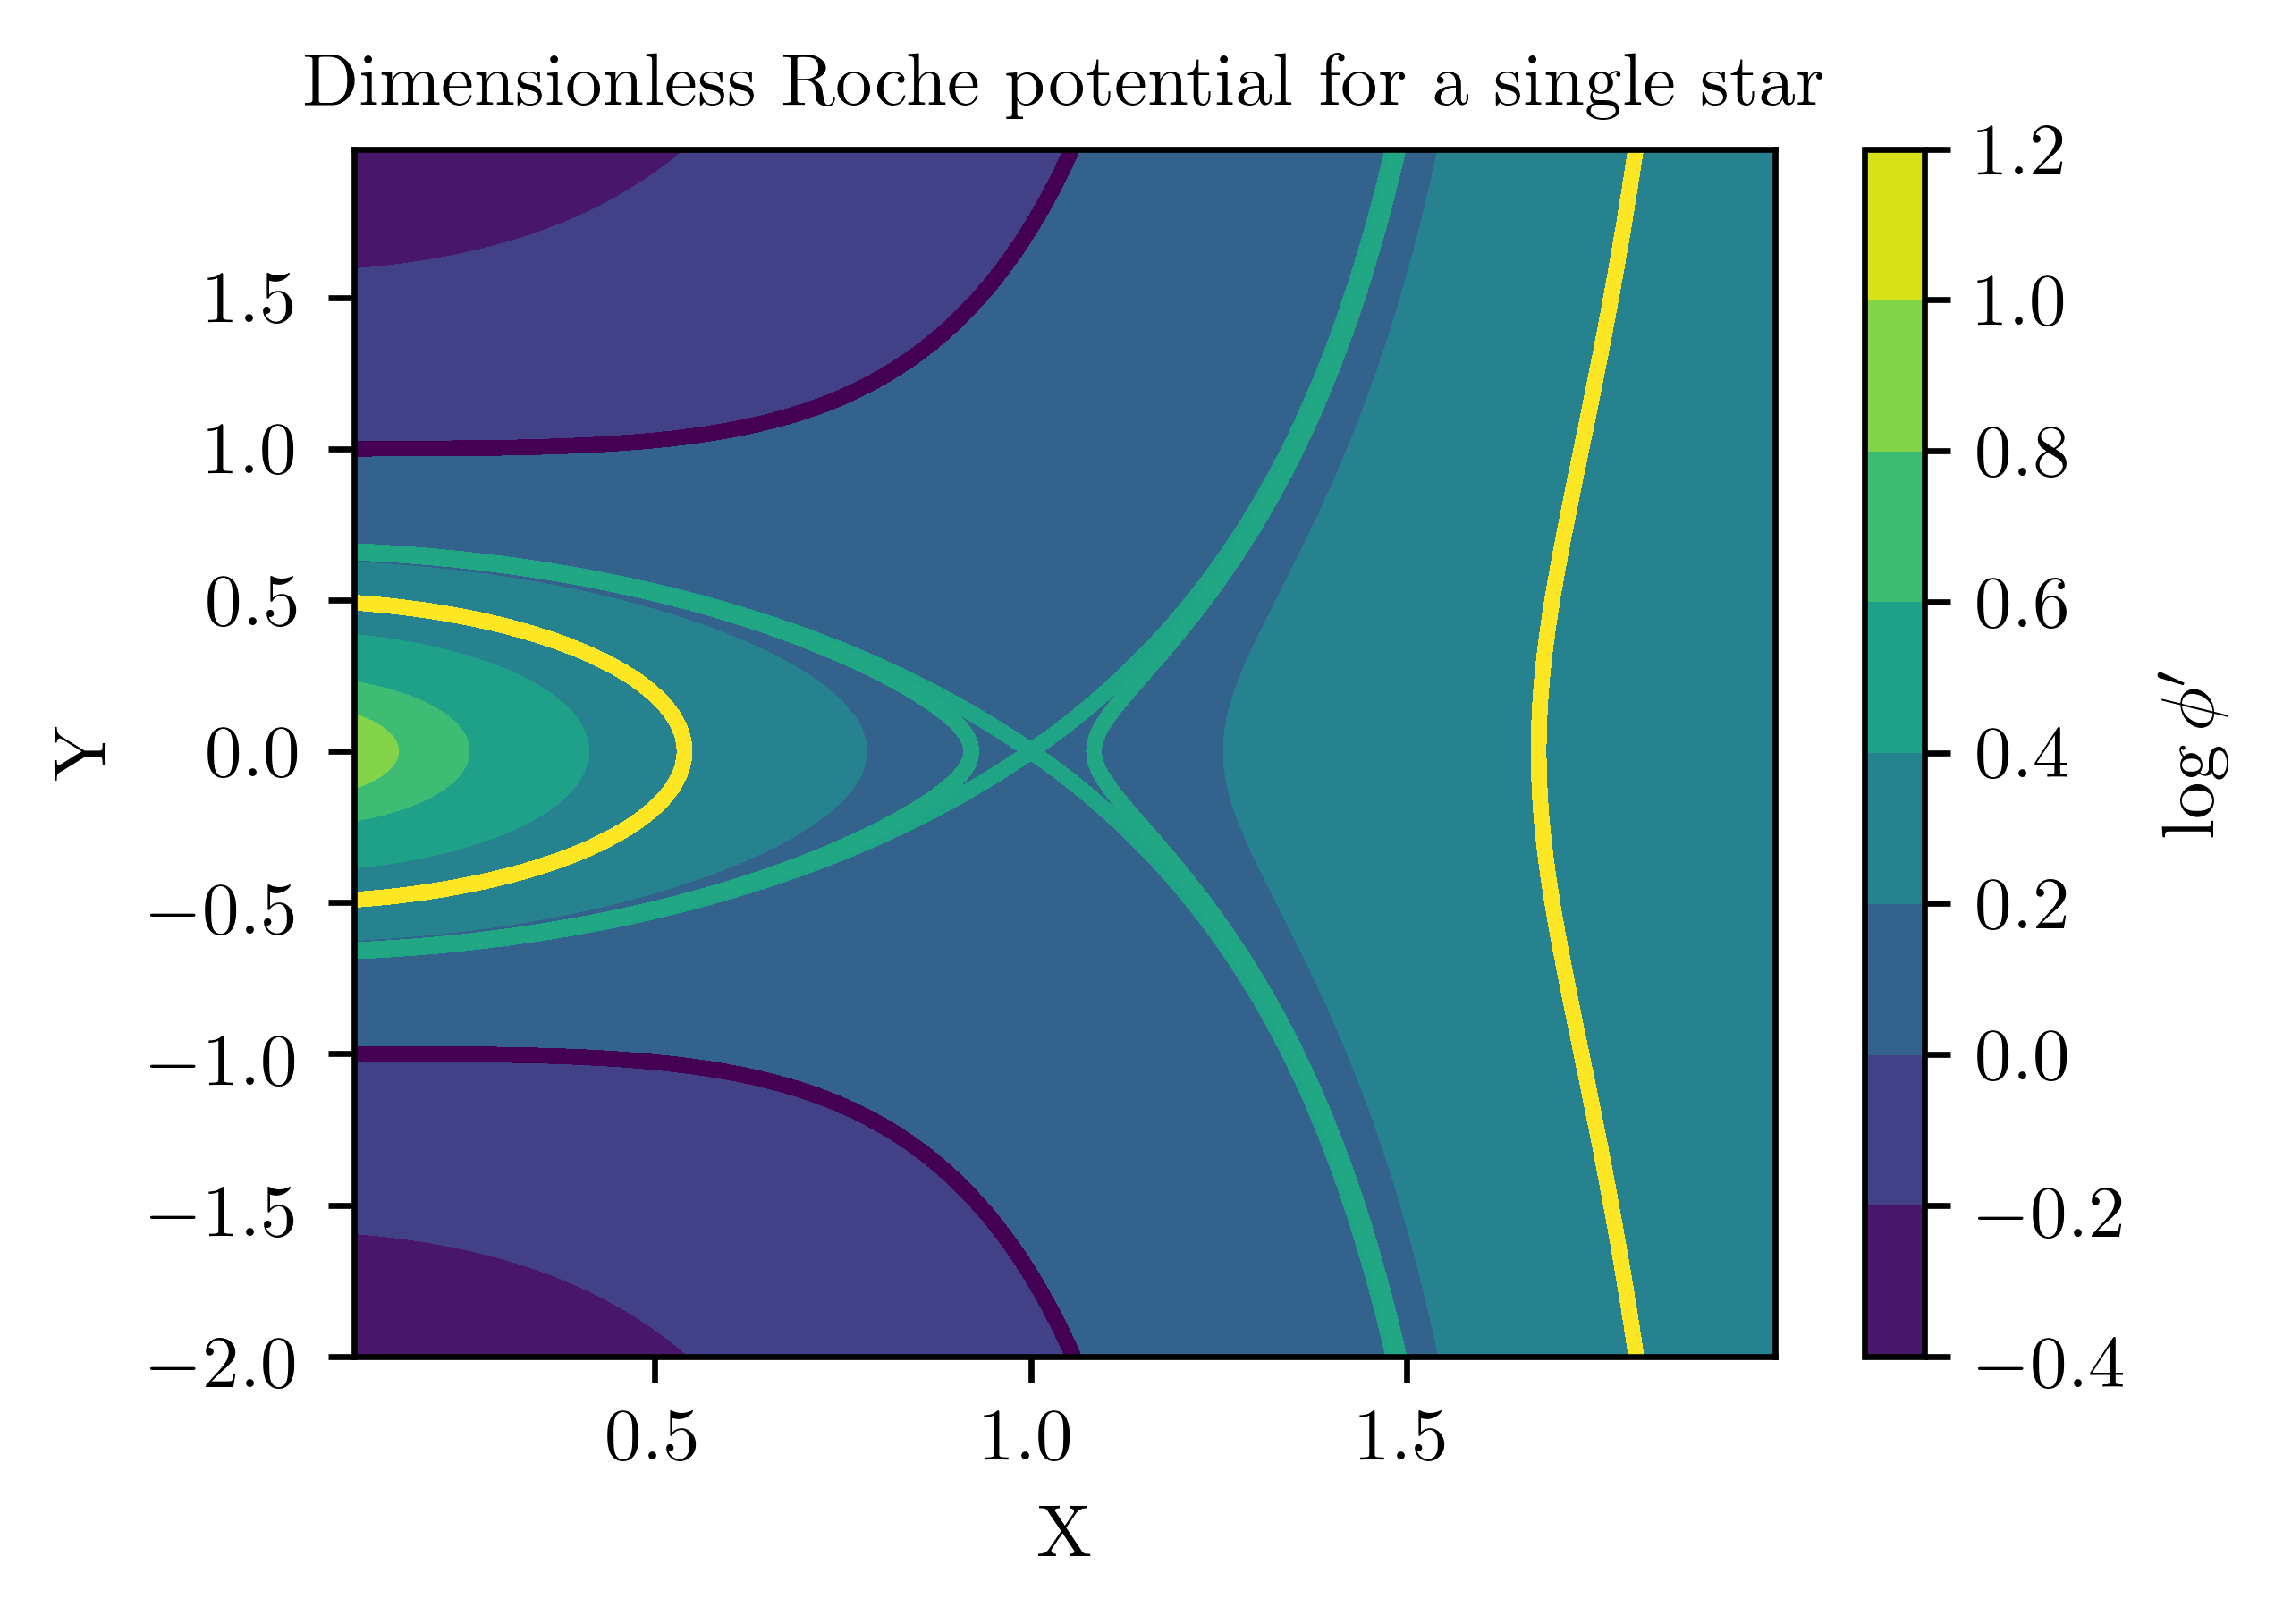

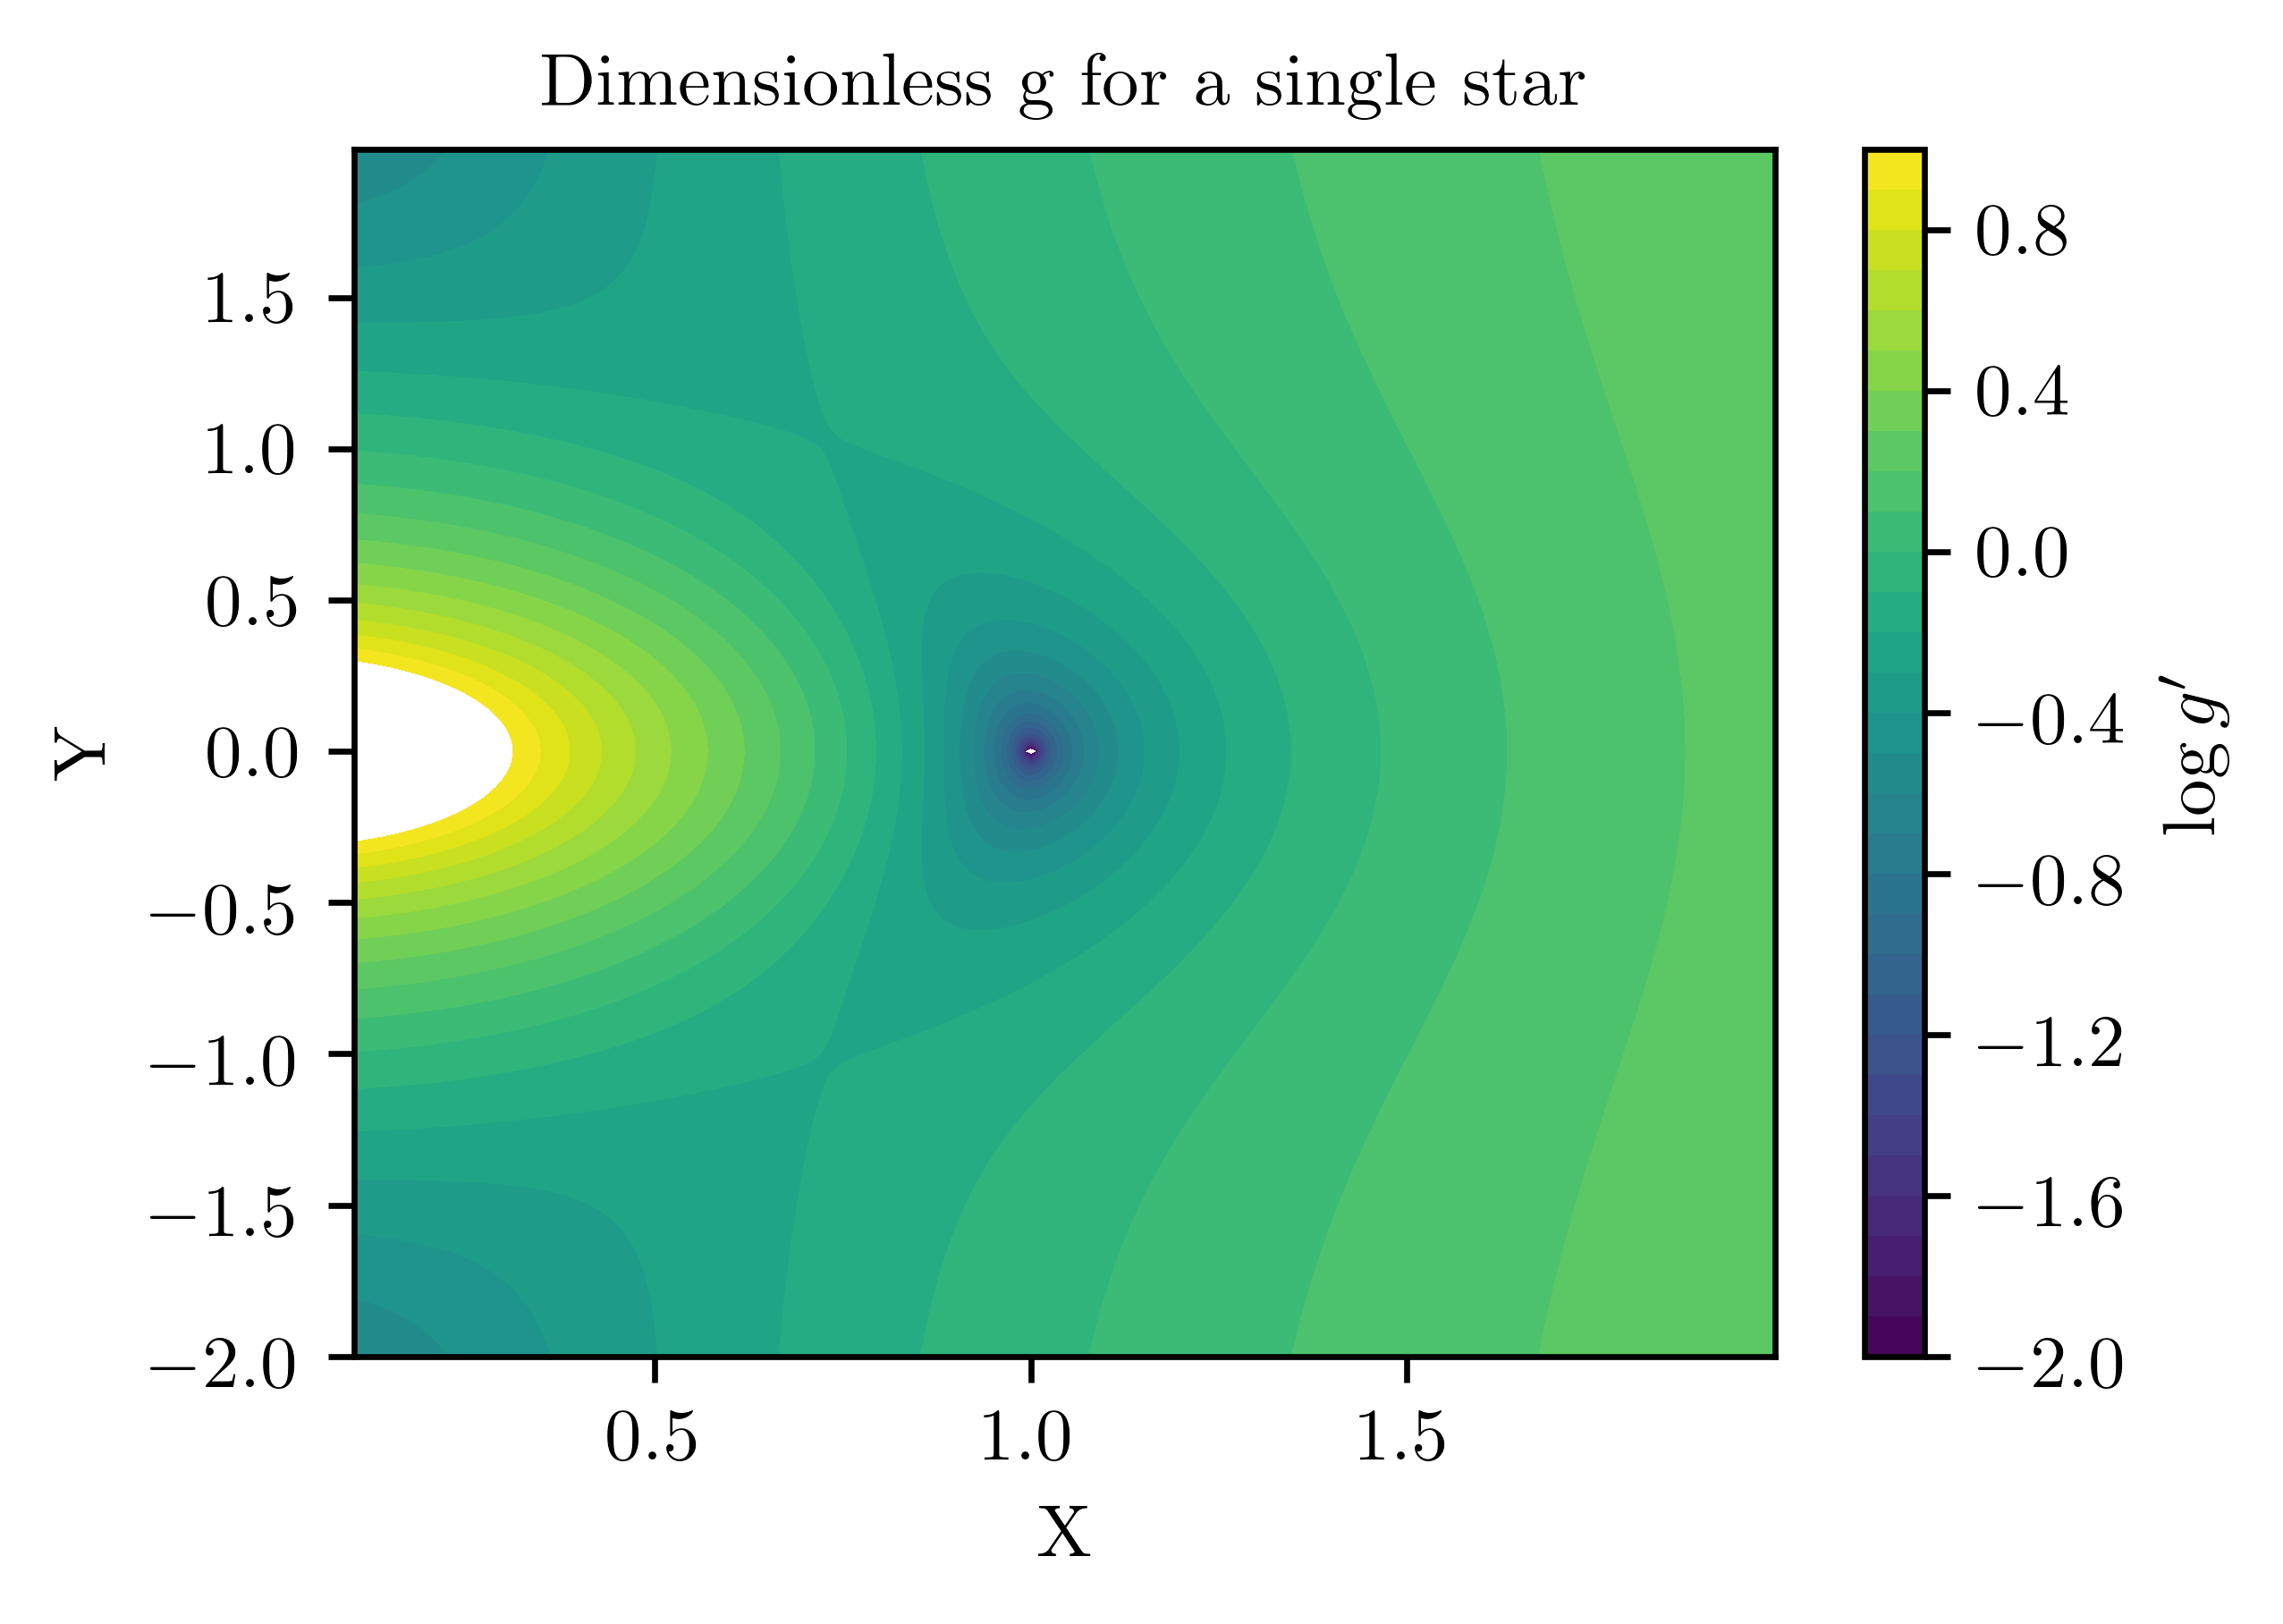

In [168]:
import numpy as np
import matplotlib.pyplot as plt

#The full Roche potential for a point mass in a rotating
#frame of reference is given by
#   phi = -GM/r-0.5*omega**2*r**2*sin(theta)**2
#For simplicity its best to use a dimensionless form of this equation
#where all quantities are replaced by a combination of G, M and omega,
#   phi' = phi/(GMw)**2/3
#   r' = r/(GM/w**2)**(1/3)
#Such that the potential is simply (ommiting the minus sign as well)
#   phi = 1/r'+0.5*r'**2*sin(theta)**2
#The effective gravity is simply given by |grad(phi)|, which results in
#   g' = sqrt((r'*sin(theta)**2-1/r'**2)**2+(r'*cos(theta)*sin(theta))**2)
#to which the actual gravity is related via
#   g' = g/(G*M*omega**4)**(1/3)


# Plot the Roche potential
x = np.arange(0.1, 2.0, 0.01)
y = np.arange(-2, 2.0, 0.01)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2+Y**2)
#ST = sin(theta), where theta is the polar angle (theta=pi/2 is the equator)
ST = X/R
Z = np.log10(1/R+0.5*R**2*ST**2)

plt.figure()
CS2 = plt.contourf(X, Y, Z)
CS1 = plt.contour(X,Y,Z,levels = np.log10([1,1.5,1.51,2]))
plt.gca().set_xlabel("X")
plt.gca().set_ylabel("Y")
cbar = plt.colorbar(CS2, label="$\\log \\phi'$")
plt.title('Dimensionless Roche potential for a single star')
plt.show()

#Plot the effective gravity
x = np.arange(0.1, 2.0, 0.01)
y = np.arange(-2, 2.0, 0.01)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2+Y**2)
ST = X/R
CT = Y/R
Z = np.log10(np.sqrt((R*ST**2-1/R**2)**2+(R*CT*ST)**2))

plt.figure()
CS2 = plt.contourf(X, Y, Z, levels=np.arange(-2,1.01,0.1))
cbar = plt.colorbar(CS2, label="$\\log g'$")
plt.gca().set_xlabel("X")
plt.gca().set_ylabel("Y")
plt.title('Dimensionless g for a single star')
plt.show()

In [176]:
import scipy.integrate as integrate

#FIRST: Compute Vphi', the dimensionless volume of the equipotential
#       then use that to get rphi, the volume equivalent radius

#REMEMBER:
#dimensionless potential is PHI=1/R+0.5*R**2*sin(theta)**2
#for a given phi, the poloidal radius Rp satisfies PHI=1/Rp
#and the equatorial radius satisfies PHI=1/Re+0.5*Re**2

#res are the equatorial radii for which we will perform the integrations
#note that re=0.9994 corresponds to omega_div_omega_crit=0.999
#wcs are w/wcrit at the equator
wcs = np.linspace(0.999,0.01,1000)
res = wcs**(2./3.)
#compute the value of the equipotential for each re
phis = 1/res+0.5*res**2
log_phis = np.log10(phis)
#rps contains the poloidal radii at each phi
rps = 1/phis

#rphis contains the volume equivalent radius at each phi, see
#Endal & Sofia 1976, eq (1).
#Integration is done by computing the volume of revolution
#corresponding to a region in the x-y plane inside the equipotential

#Eq. 4 in Marchant (2018)
def dVphi_dx(x,wc):
    y = np.sqrt((1/np.power(wc,2./3.)+np.power(wc,4./3.)/2-x**2/2)**(-2)-x**2)
    return 2*np.pi*x*y

rphis = np.zeros(len(log_phis))
for k, wc in enumerate(wcs):
    #xrange for the integration goes from zero to the equatorial radius
    result = integrate.quad(lambda x: dVphi_dx(x,wc), 0, res[k])

    #just integrated one hemisphere, multiply by two
    vol = result[0]*2
    rphi = np.power(3./4.*vol/np.pi,1./3.)
    rphis[k] = rphi

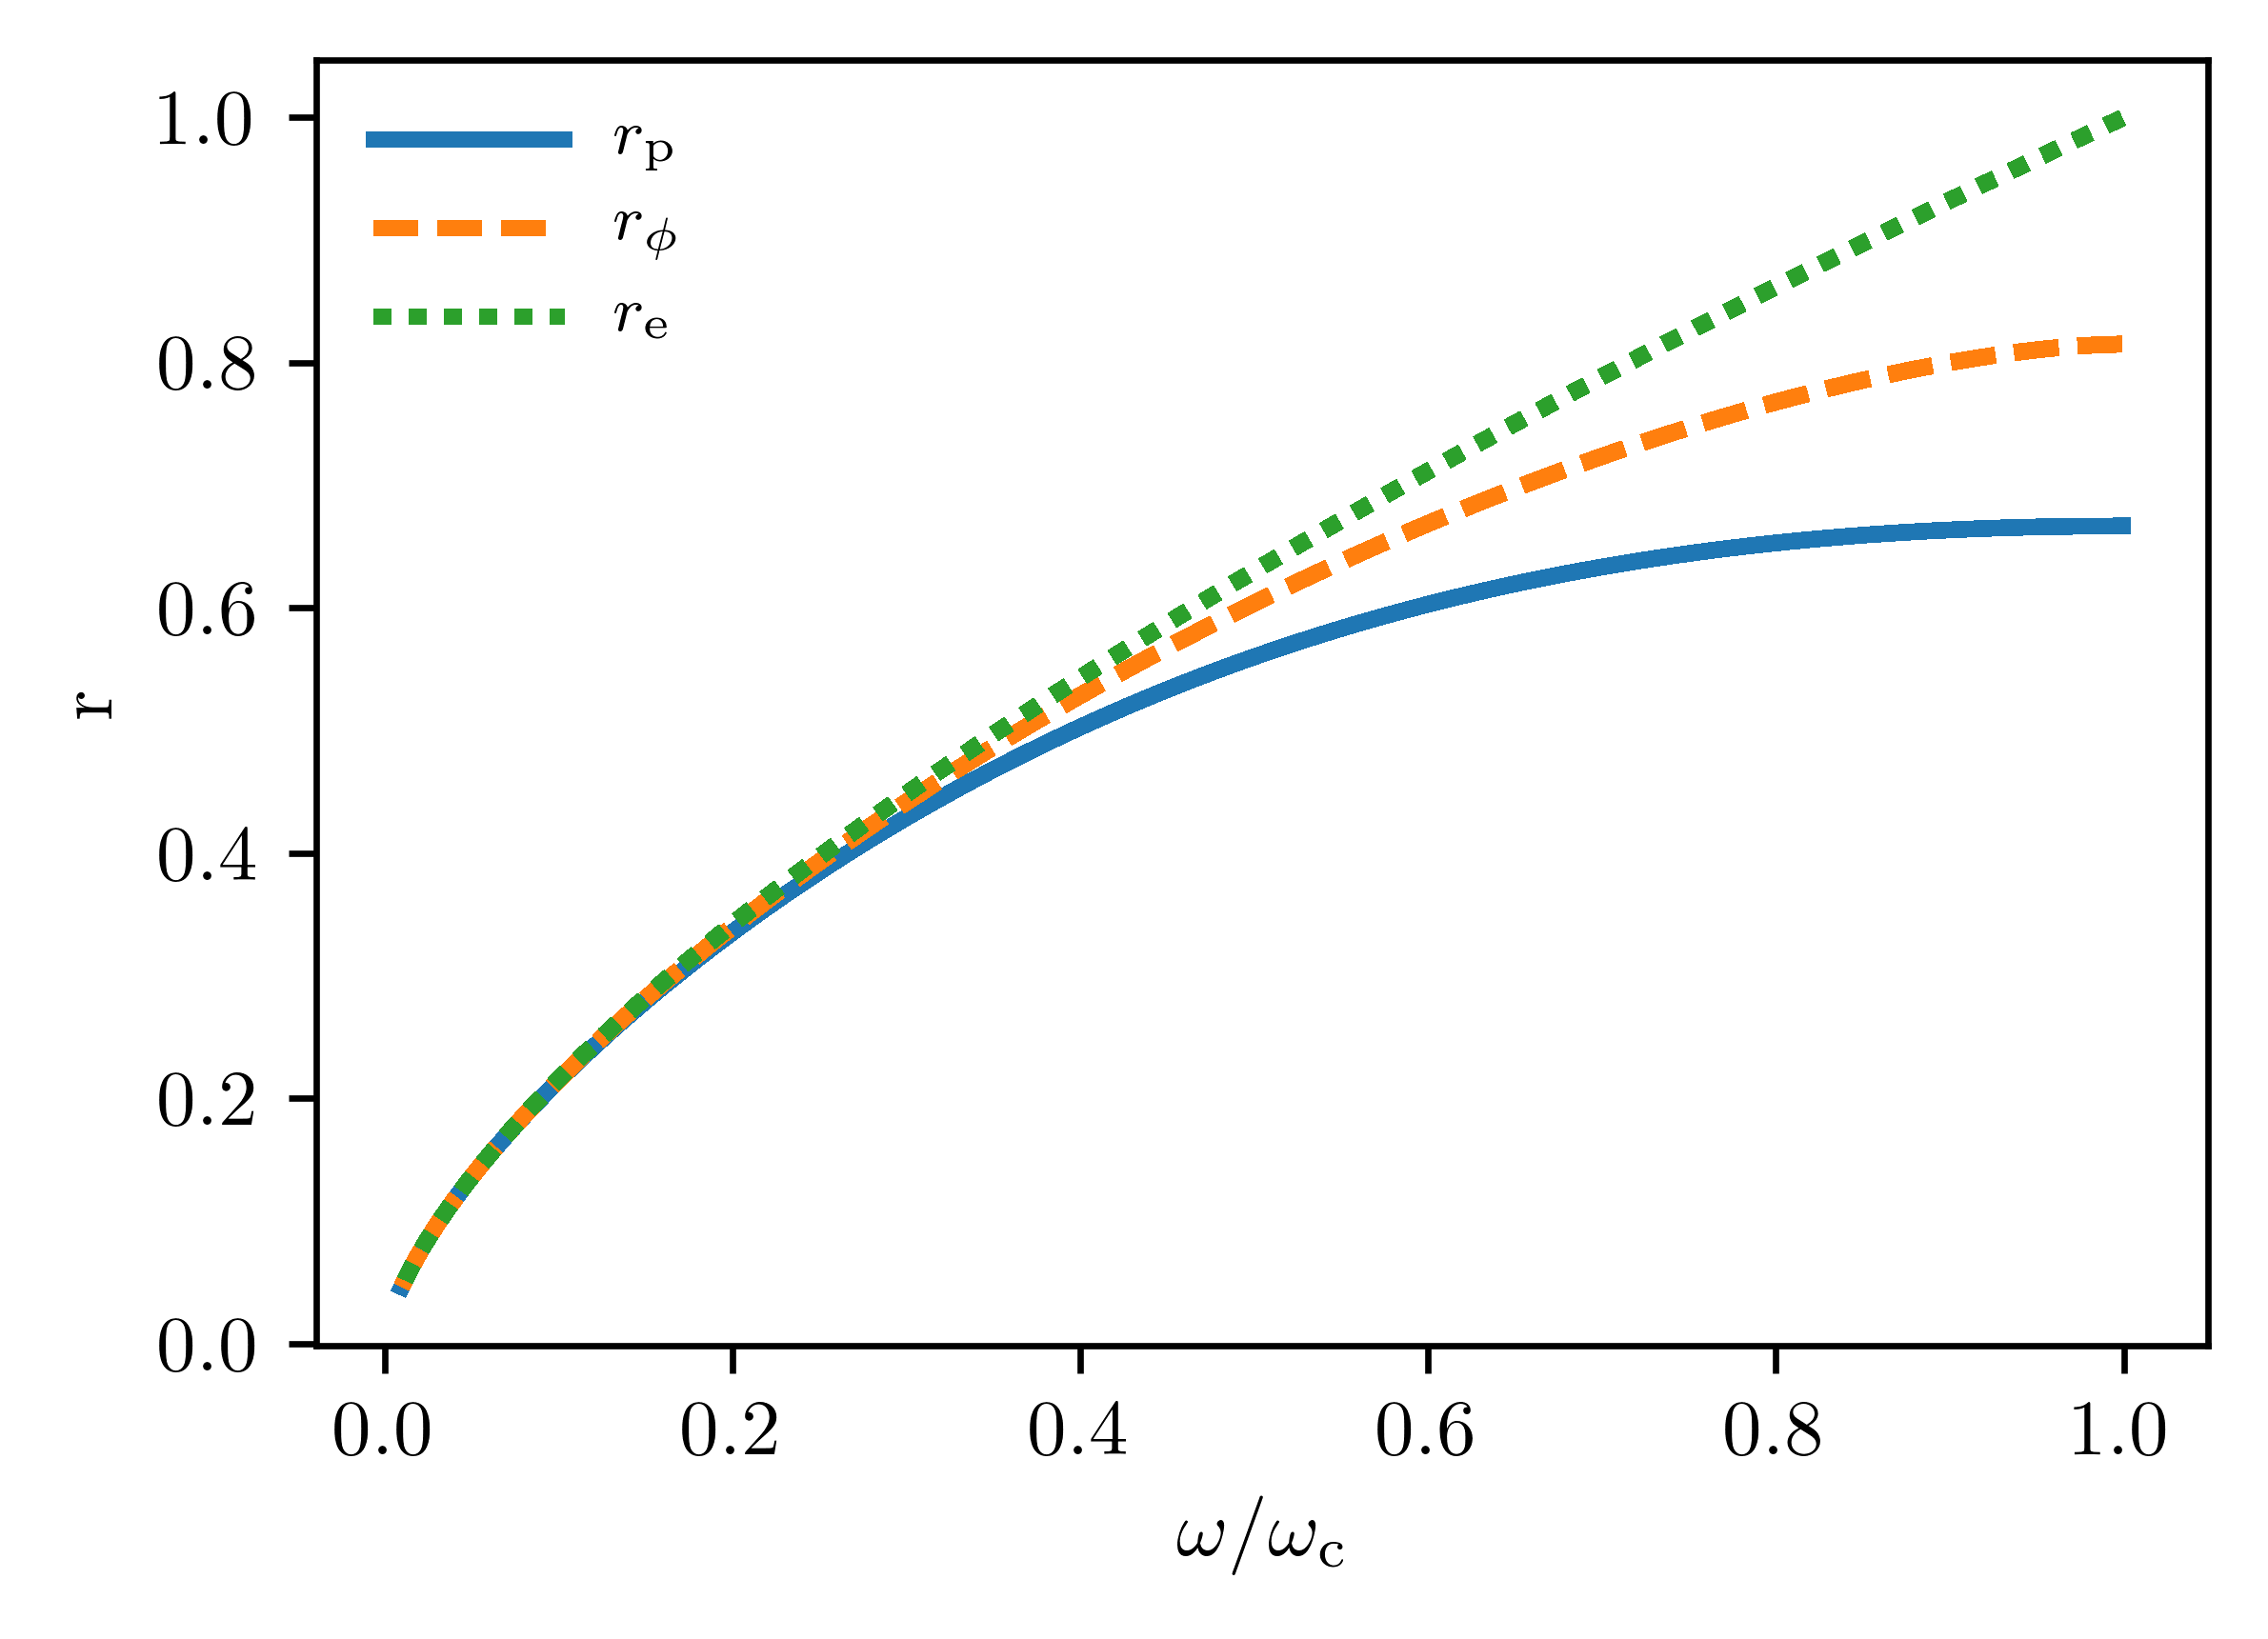

In [177]:
import matplotlib.pyplot as plt
#results can be nicely plotted in terms of omega/omega_crit
#at the equator by simply taking a power of the equatorial
#radii we have stored in res[:]. At the equator, this is given by
#    omega/omegac = omega/sqrt(G*M/re**3)
#which in dimensionless units is simply
#    omega/omegac = r**(3/2)
plt.plot(res**(3./2.),rps,"-", label = "$r_{\\rm p}$")
plt.plot(res**(3./2.),rphis,"--",label = "$r_{\\phi}$")
plt.plot(res**(3./2.),res,":", label = "$r_{\\rm e}$")
plt.gca().set_xlabel("$\omega/\omega_{\\rm c}$")
plt.gca().set_ylabel("r")
plt.legend(loc=2)
plt.show()

In [178]:
#Next, compute the dimensionless area of the equipotentials.
#This is related to the actual physical are via
#    Sphi' = Sphi/(G*M/omega**2)**(2/3)

#Eq. (6) in Marchant (2018)
def dA_dx(x,wc):
    y = np.sqrt((1/np.power(wc,2./3.)+np.power(wc,4./3.)/2-x**2/2)**(-2)-x**2)
    dydx = ((2.*x)/(-x**2/2+wc**(4./3.)/2.+1./wc**(2./3.))**3-2.*x) \
       /(2.*np.sqrt(1./(-x**2/2.+wc**(4./3.)/2.+1./wc**(2./3.))**2-x**2))
    return 2*np.pi*x*np.sqrt(dydx**2+1)

Sphis = np.zeros(len(log_phis))
for k, wc in enumerate(wcs):
    #xrange for the integration goes from zero to the equatorial radius
    result = integrate.quad(lambda x: dA_dx(x,wc), 0, res[k])
    Sphis[k] = result[0]*2
    
    #Sp = 4*np.pi*rps[k]**2

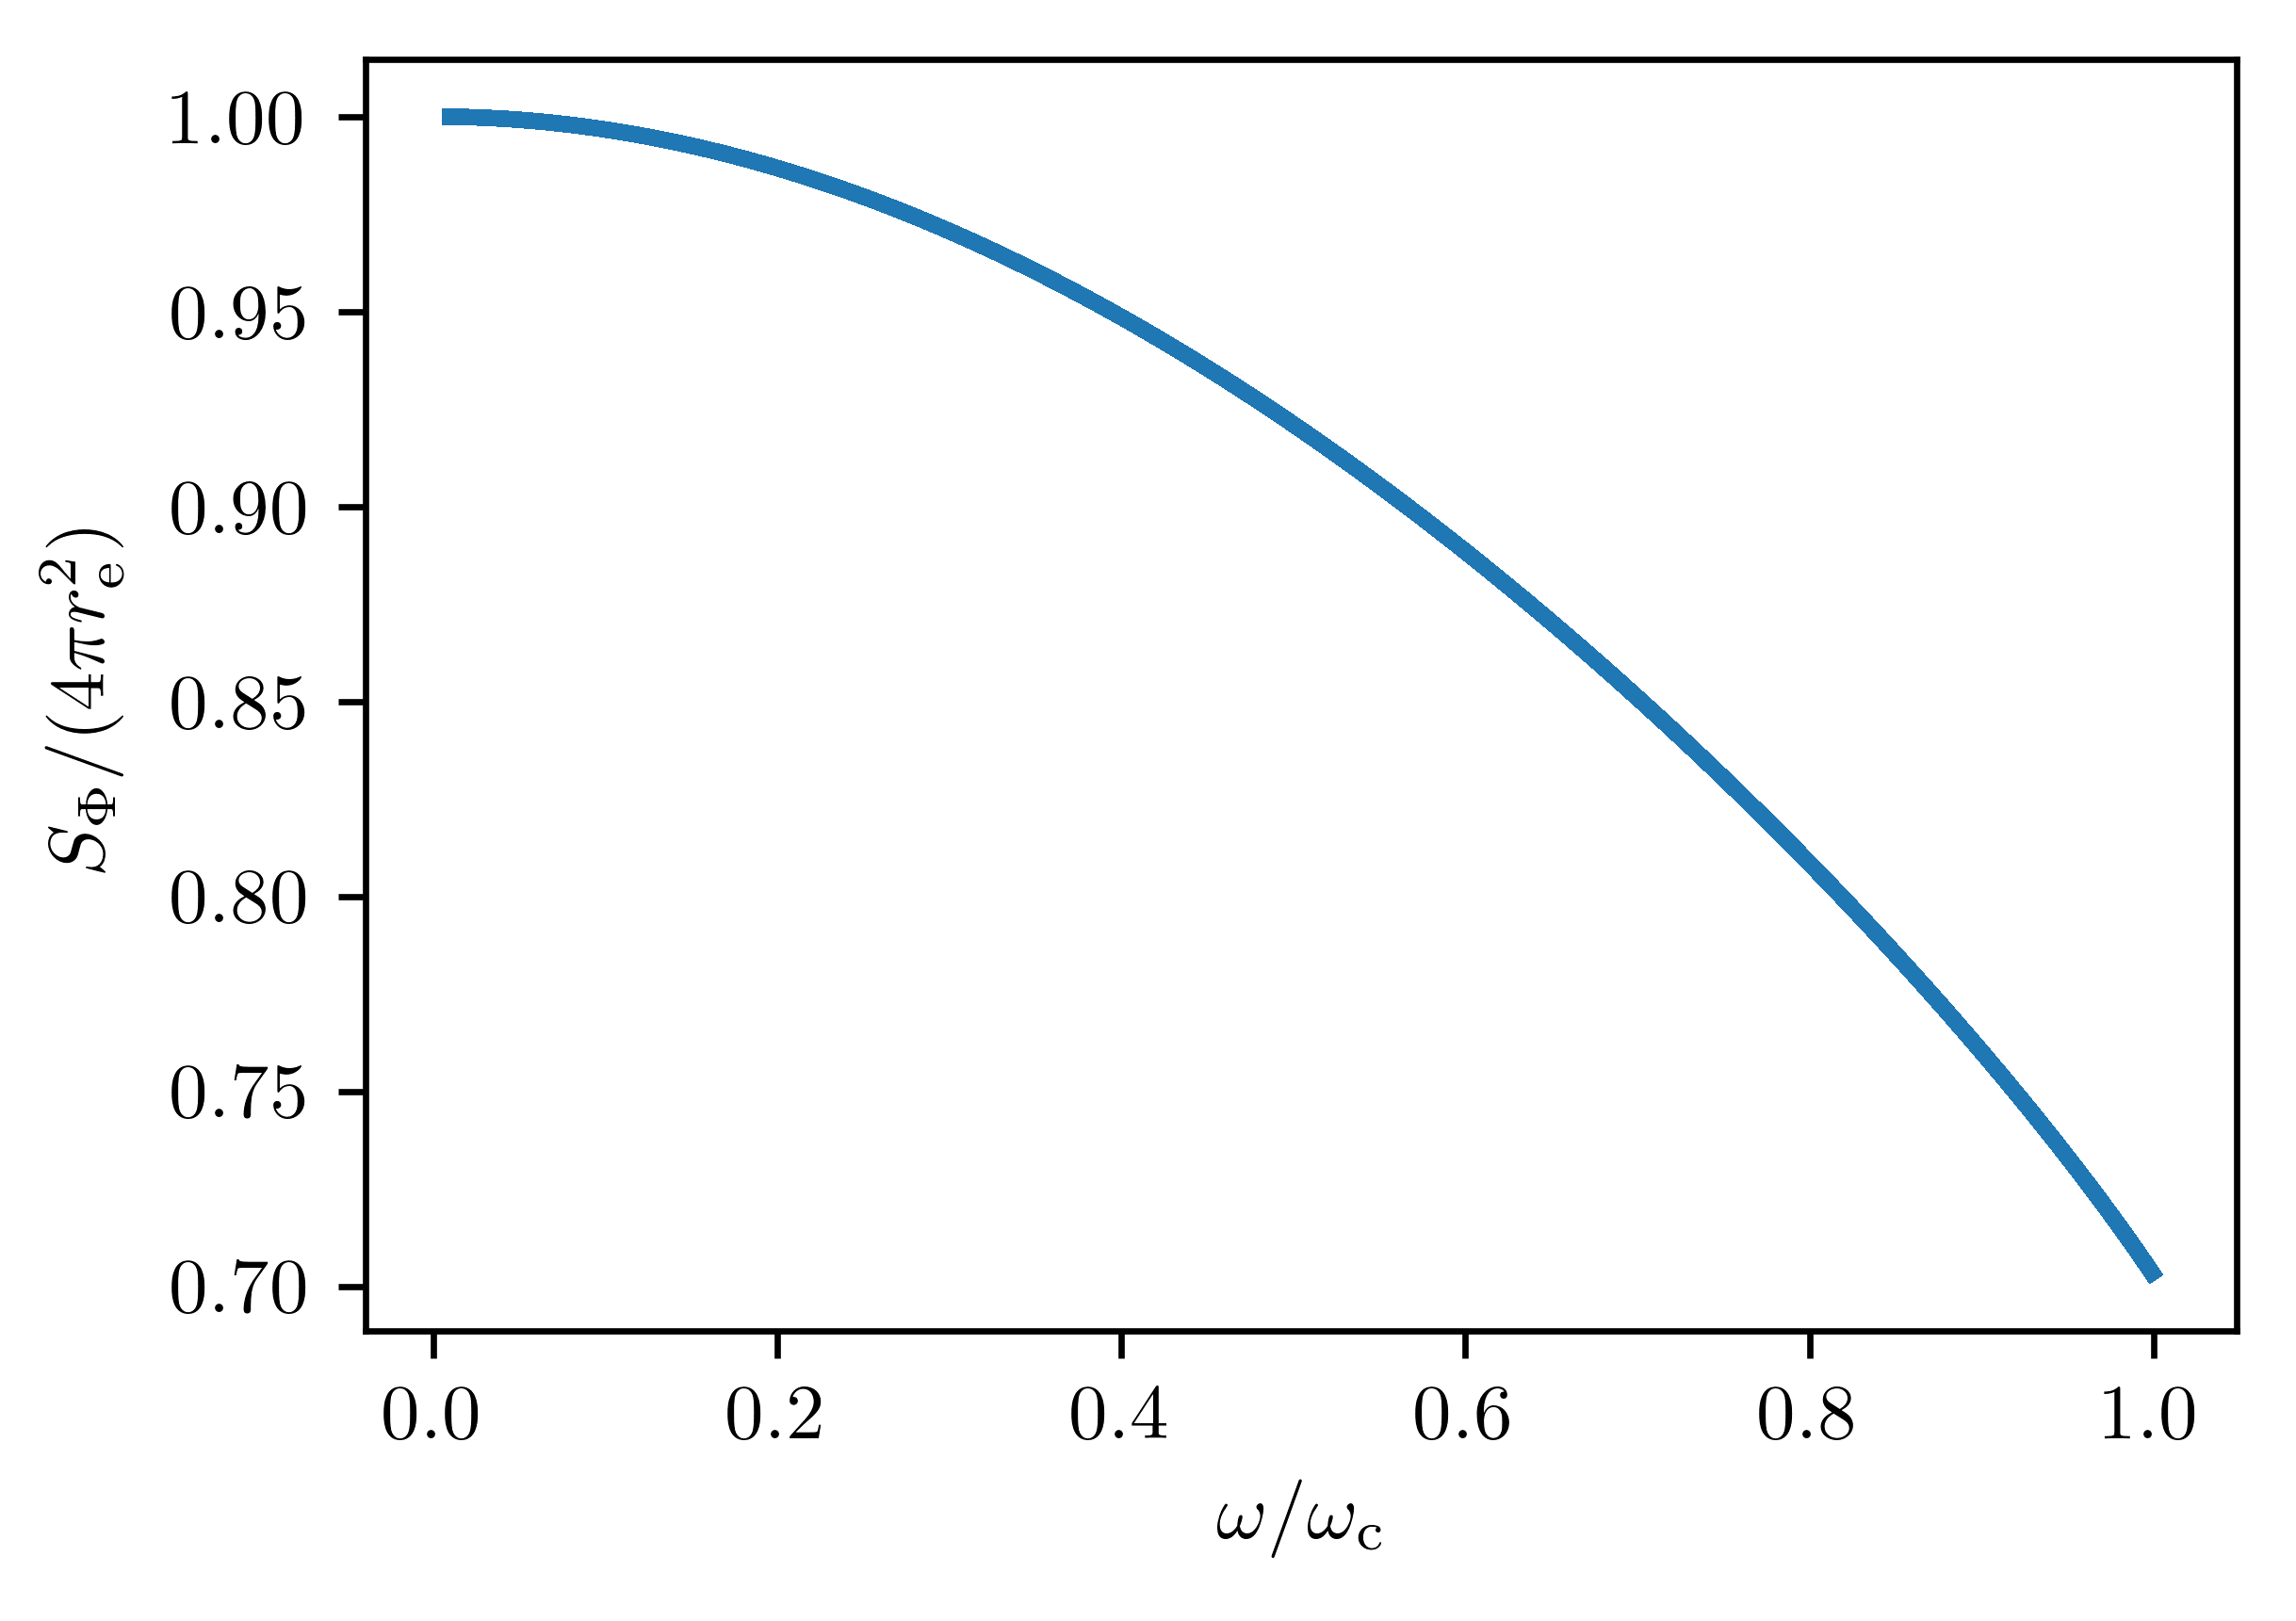

In [179]:
import matplotlib.pyplot as plt
#results can be nicely plotted in terms of omega/omega_crit
#at the equator by simply taking a power of the equatorial
#radii we have stored in res[:]. At the equator, this is given by
#    omega/omegac = omega/sqrt(G*M/re**3)
#which in dimensionless units is simply
#    omega/omegac = r**(3/2)
plt.plot(res**(3./2.),Sphis/(4*np.pi*res**2),"-")#, label = "$S/Se$")
plt.gca().set_xlabel("$\omega/\omega_{\\rm c}$")
plt.gca().set_ylabel("$S_{\\rm \\Phi}/(4\\pi r_{\\rm e}^2)$")
#plt.legend(loc=1)
plt.show()

In [180]:
#Almost the same as the previous one, Eq. (7) in Marchant (2018) but with g^{-1}
#Compute Fp from this one
def invg_times_dA_dx(x,wc):
    y = np.sqrt((1/np.power(wc,2./3.)+np.power(wc,4./3.)/2-x**2/2)**(-2)-x**2)
    dydx = ((2.*x)/(-x**2/2+wc**(4./3.)/2.+1./wc**(2./3.))**3-2.*x) \
       /(2.*np.sqrt(1./(-x**2/2.+wc**(4./3.)/2.+1./wc**(2./3.))**2-x**2))
    g = np.sqrt((-x/np.power(x**2+y**2,1.5)+x)**2
                +(y/np.power(x**2+y**2,1.5))**2)
    return 2*np.pi*x*np.sqrt(dydx**2+1)/g

fps = np.zeros(len(log_phis))
inv_g_avg = np.zeros(len(log_phis))
for k, wc in enumerate(wcs):
    #xrange for the integration goes from zero to the equatorial radius
    result = integrate.quad(lambda x: invg_times_dA_dx(x,wc), 0, res[k])
    inv_g_avg[k] = result[0]*2/Sphis[k]
    fps[k] = 4*np.pi*rphis[k]**4/Sphis[k]/inv_g_avg[k]
    

In [181]:
#Eq. (7) in Marchant (2018)
#Compute Ft from this one
def g_times_dA_dx(x,wc):
    y = np.sqrt((1/np.power(wc,2./3.)+np.power(wc,4./3.)/2-x**2/2)**(-2)-x**2)
    dydx = ((2.*x)/(-x**2/2+wc**(4./3.)/2.+1./wc**(2./3.))**3-2.*x) \
       /(2.*np.sqrt(1./(-x**2/2.+wc**(4./3.)/2.+1./wc**(2./3.))**2-x**2))
    g = np.sqrt((-x/np.power(x**2+y**2,1.5)+x)**2
                +(y/np.power(x**2+y**2,1.5))**2)
    return 2*np.pi*x*np.sqrt(dydx**2+1)*g

fts = np.zeros(len(log_phis))
g_avg = np.zeros(len(log_phis))
for k, wc in enumerate(wcs):
    #xrange for the integration goes from zero to the equatorial radius
    result = integrate.quad(lambda x: g_times_dA_dx(x,wc), 0, res[k])
    g_avg[k] = result[0]*2/Sphis[k]
    fts[k] = (4*np.pi*rphis[k]**2/Sphis[k])**2/(g_avg[k]*inv_g_avg[k])


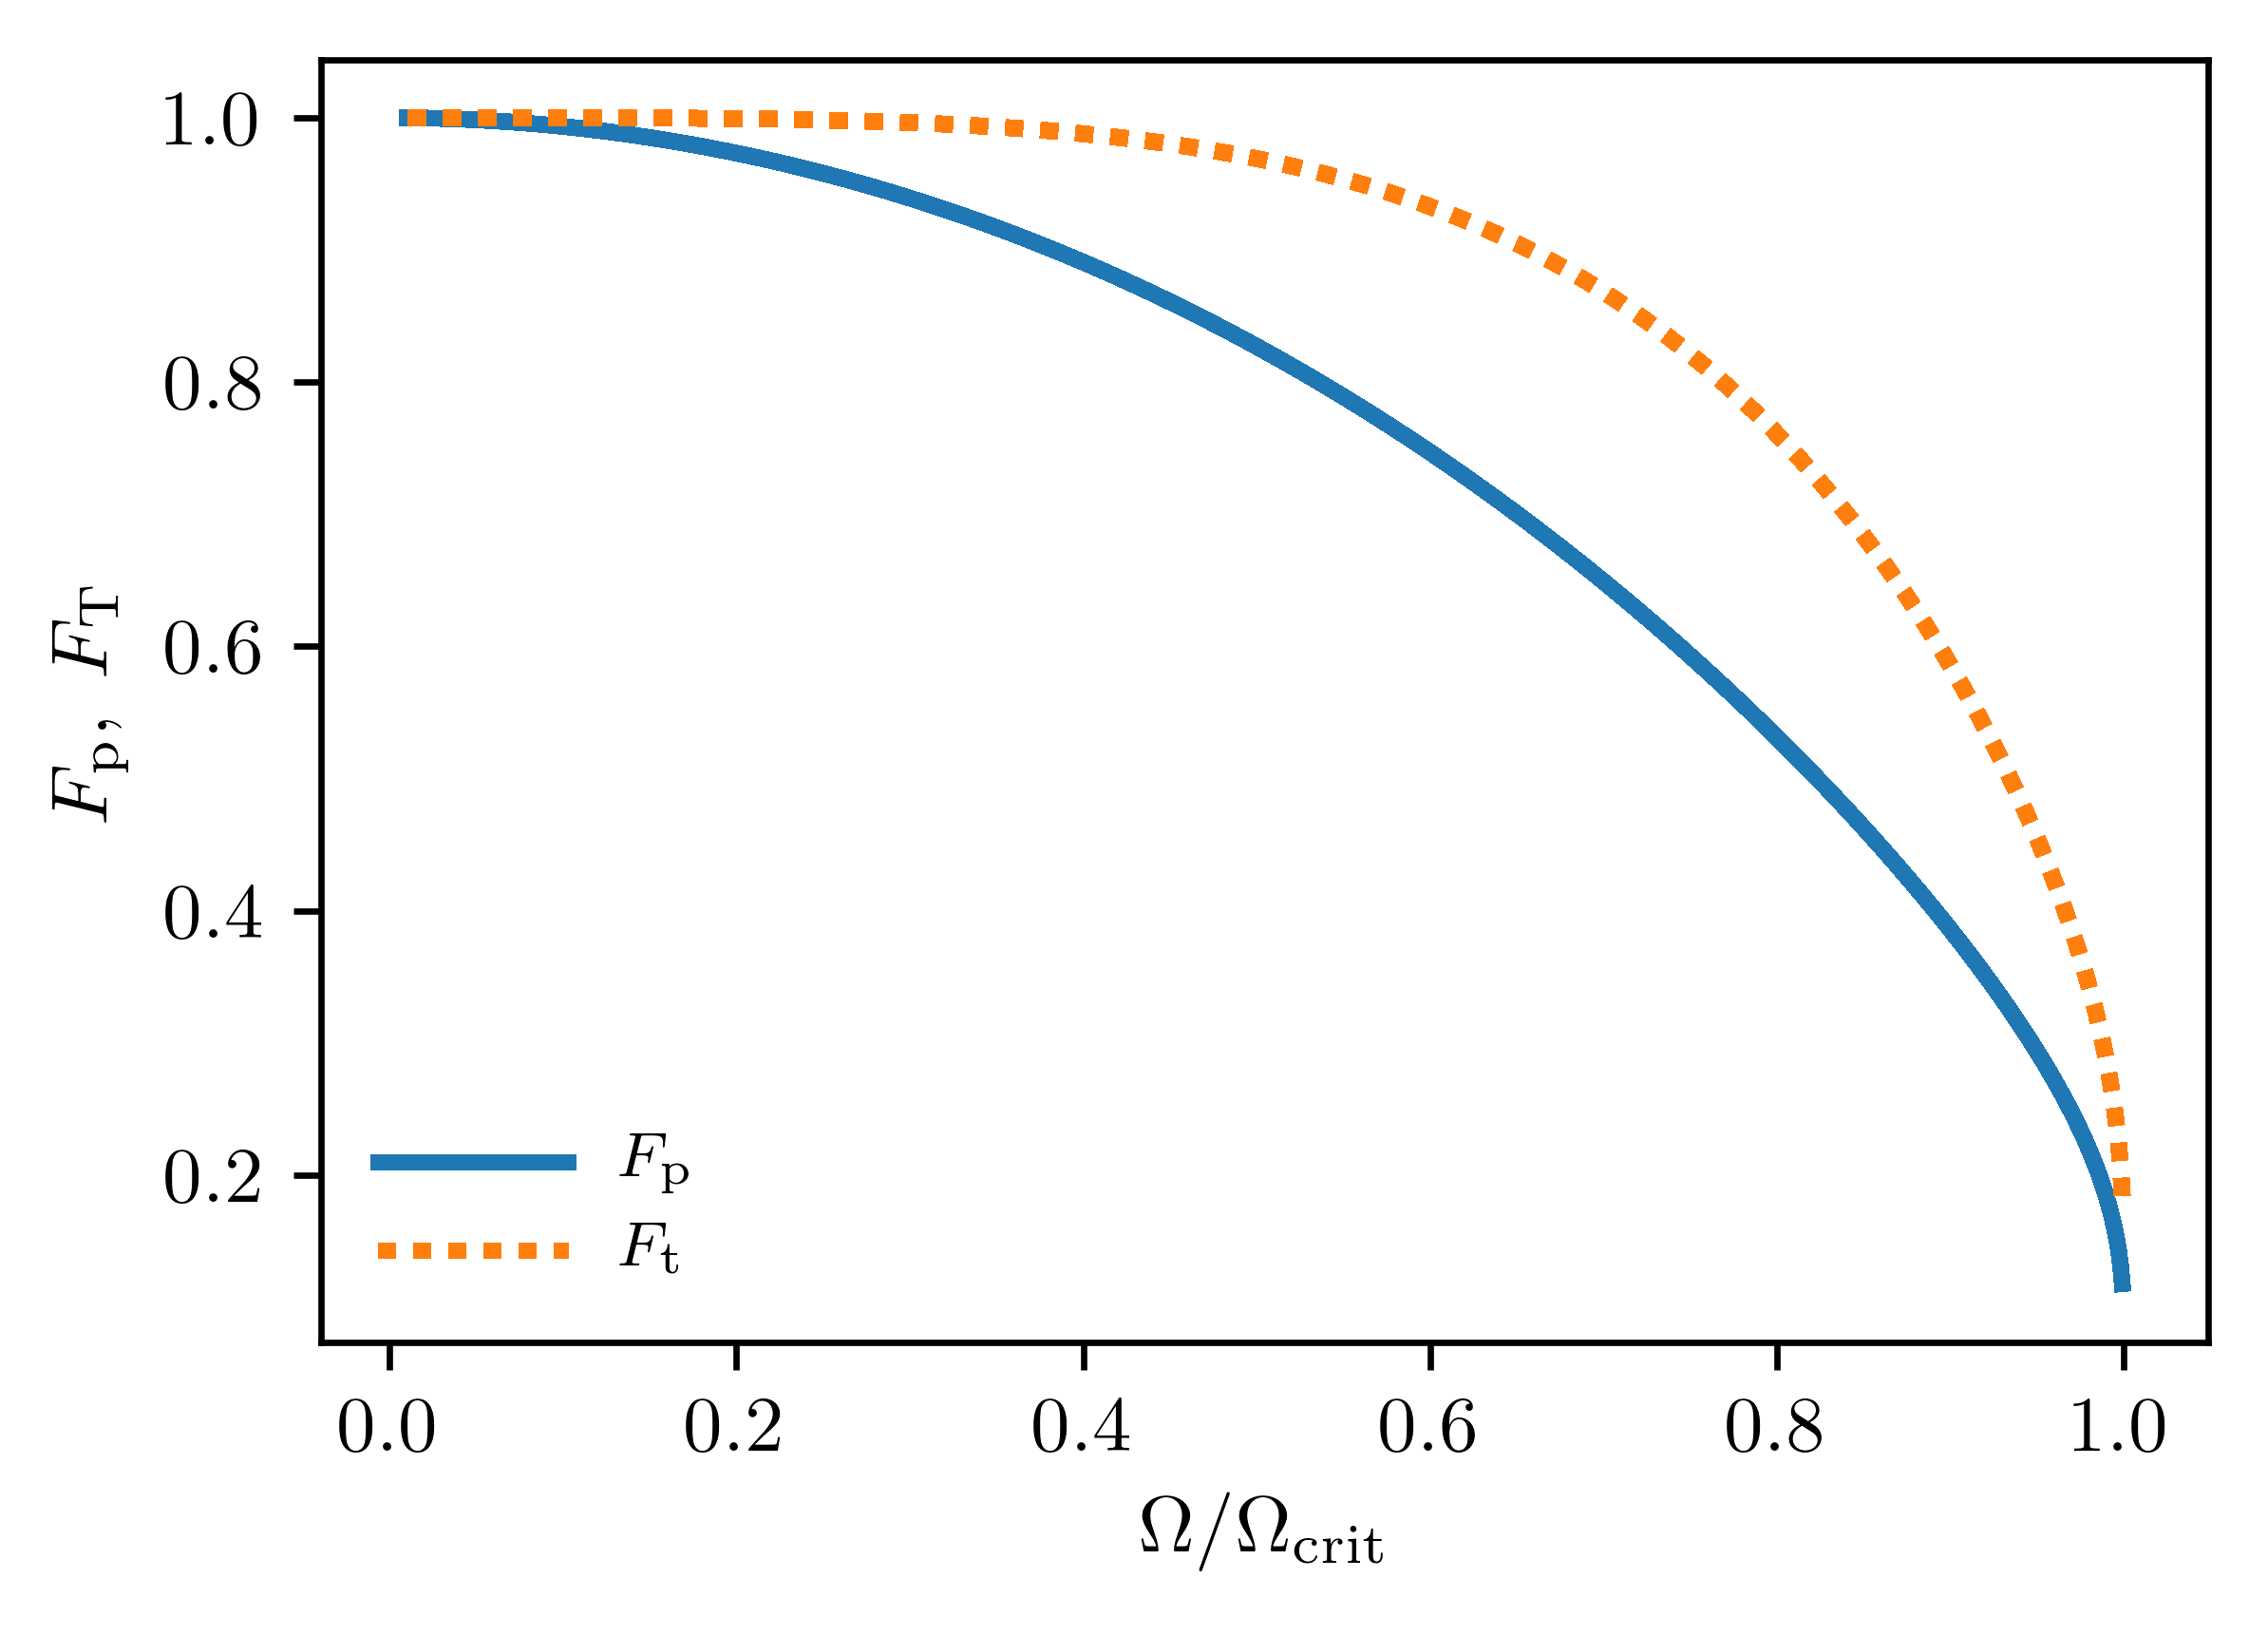

In [182]:
import matplotlib.pyplot as plt
#plt.plot(np.insert(wcs,0,1),np.insert(fps,0,0),"-", label = "$F_{\\rm p}$")
#plt.plot(np.insert(wcs,0,1),np.insert(fts,0,0),":", label = "$F_{\\rm t}$")
plt.plot(wcs,fps,"-", label = "$F_{\\rm p}$")
plt.plot(wcs,fts,":", label = "$F_{\\rm t}$")
plt.gca().set_xlabel("$\Omega/\Omega_{\\rm crit}$")
plt.gca().set_ylabel("$F_{\\rm p},\\; F_{\\rm T}$")
plt.legend(loc=3)
plt.savefig("ftfp_vs_omegac.pdf")
plt.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in arctanh
  if __name__ == '__main__':


[        nan  1.06152161]


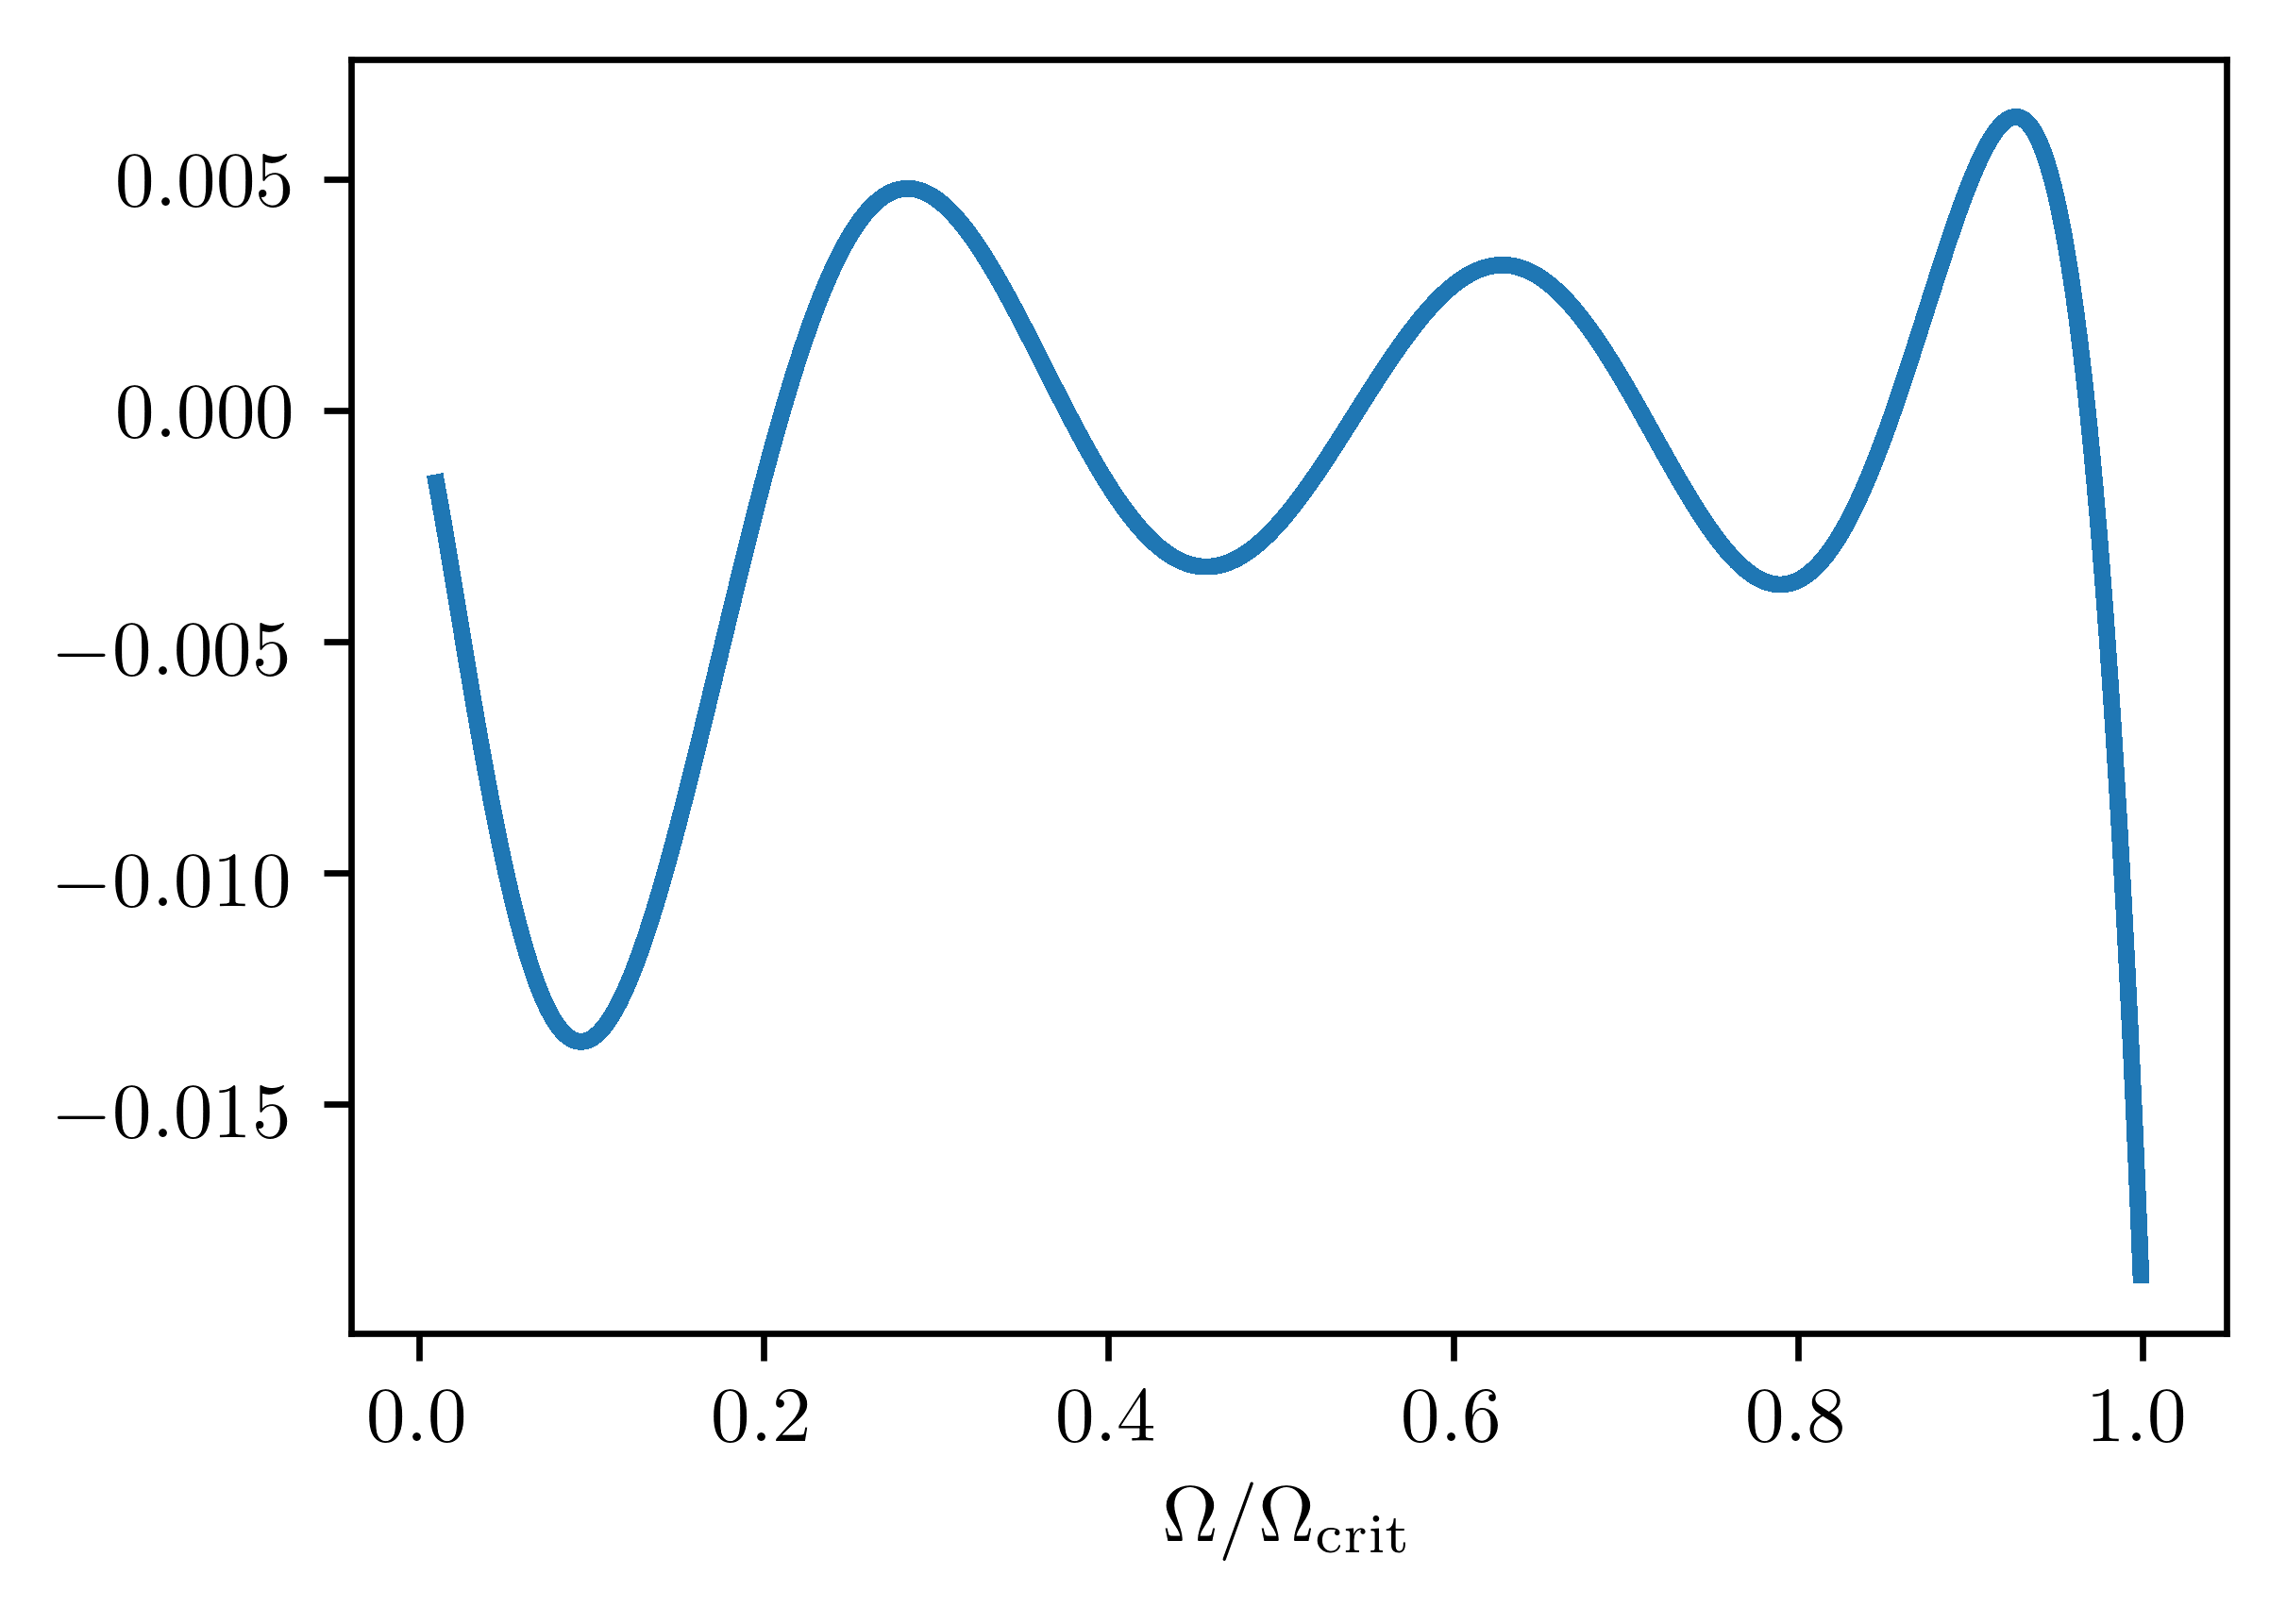

[  -0.74326321   14.54657336  -90.93906363  267.78202661 -369.60862529
  194.71960398]


In [207]:
#Fit omega(rphi'), gives Eq(9) in Marchant (2018)

from scipy.optimize import curve_fit
x0 = rphis
y0 = wcs

crit_val = 0.8148867 #value of the surface

print(np.power(3*(-4./3.+np.sqrt(3)+2*np.arctanh([2,0])-2*np.arctanh([3,0])),1./3.))

def func(x, a,b,c,d,e,f):
    return (x**(3./2.))*(1+a*x**2+b*x**4+c*x**6+d*x**8+e*x**10+f*x**12)
popt, pcov = curve_fit(func, x0, y0)
plt.plot(wcs, ((func(x0, *popt)-y0)/y0),'-', label='fit')
#plt.plot(x0, func(x0, *popt),'-', label='fit')
#plt.plot(x0, res**(3./2.), ':', label='numerical integral')
#plt.gca().set_ylim([-0.05,0.05])
#plt.gca().set_ylim([-0.05,0.05])
plt.gca().set_ylabel("relative error $\omega(r_\Phi)$")
plt.gca().set_xlabel("$\Omega/\Omega_{\\rm crit}$")
plt.show()
print(popt)

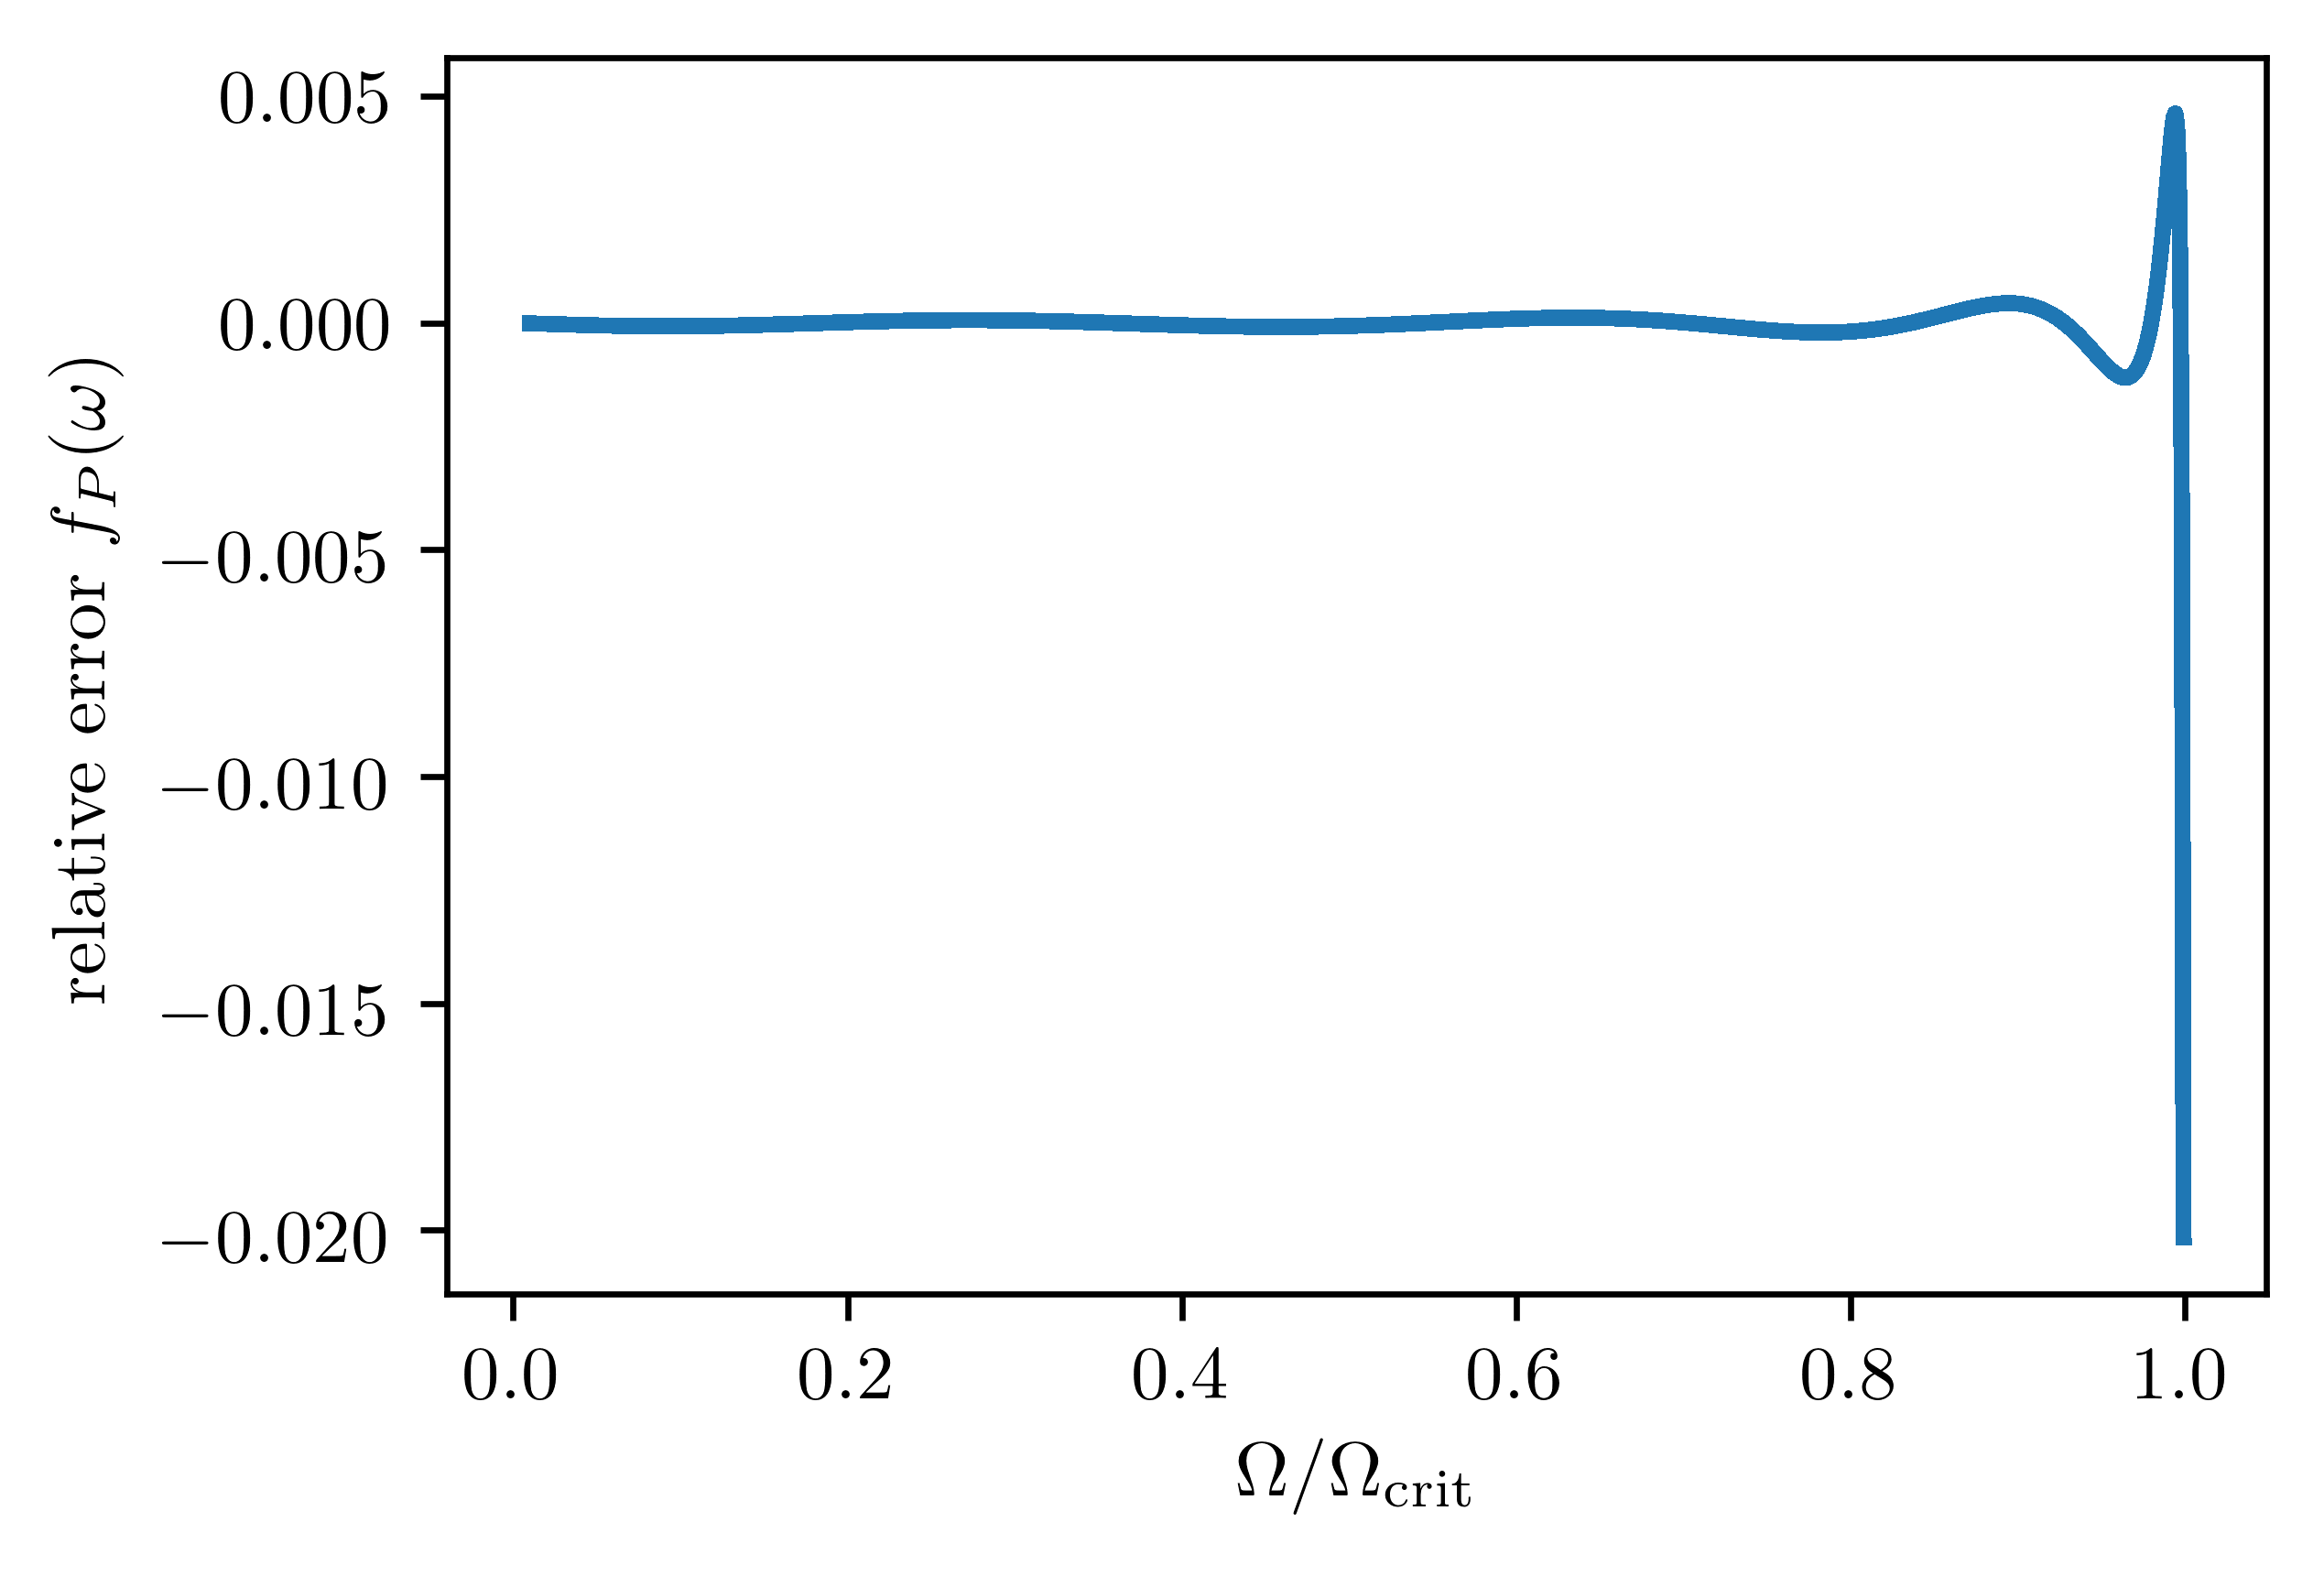

[ 0.96108672  0.17750271 -0.40886499 -0.39412452  1.04037052 -2.25173438
  2.36518664 -0.9869742 ]
0.700302236729


In [226]:
from scipy.optimize import curve_fit
x0 = wcs
y0 = fps

#def func(x, a,b):
#    return (cos(x**(a)*np.pi/2.))**b
def func(x, a,b,c,d,e,f,g,h):
    return (cos(x**(a)*np.pi/2.))**b*(1+c*x**2+d*x**4+e*x**6+f*x**8+g*x**10+h*x**12)
    #return (1+c*x**2+d*x**4+e*x**6+f*x**8+g*x**10+h*x**12)
popt, pcov = curve_fit(func, x0, y0)
plt.plot(x0, ((func(x0, *popt)-fps)/fps),'-', label='fit')
#plt.plot(x0, np.log10(1-func(x0, *popt)),'-', label='fit')
#plt.plot(x0, np.log10(1-fps), ':', label='numerical integral')
#plt.gca().set_ylim([-0.05,0.05])
#plt.gca().set_ylim([-0.05,0.05])
plt.gca().set_ylabel("relative error $f_P(\omega)$")
plt.gca().set_xlabel("$\Omega/\Omega_{\\rm crit}$")
plt.show()
print(popt)
print(func(0.65, *popt))

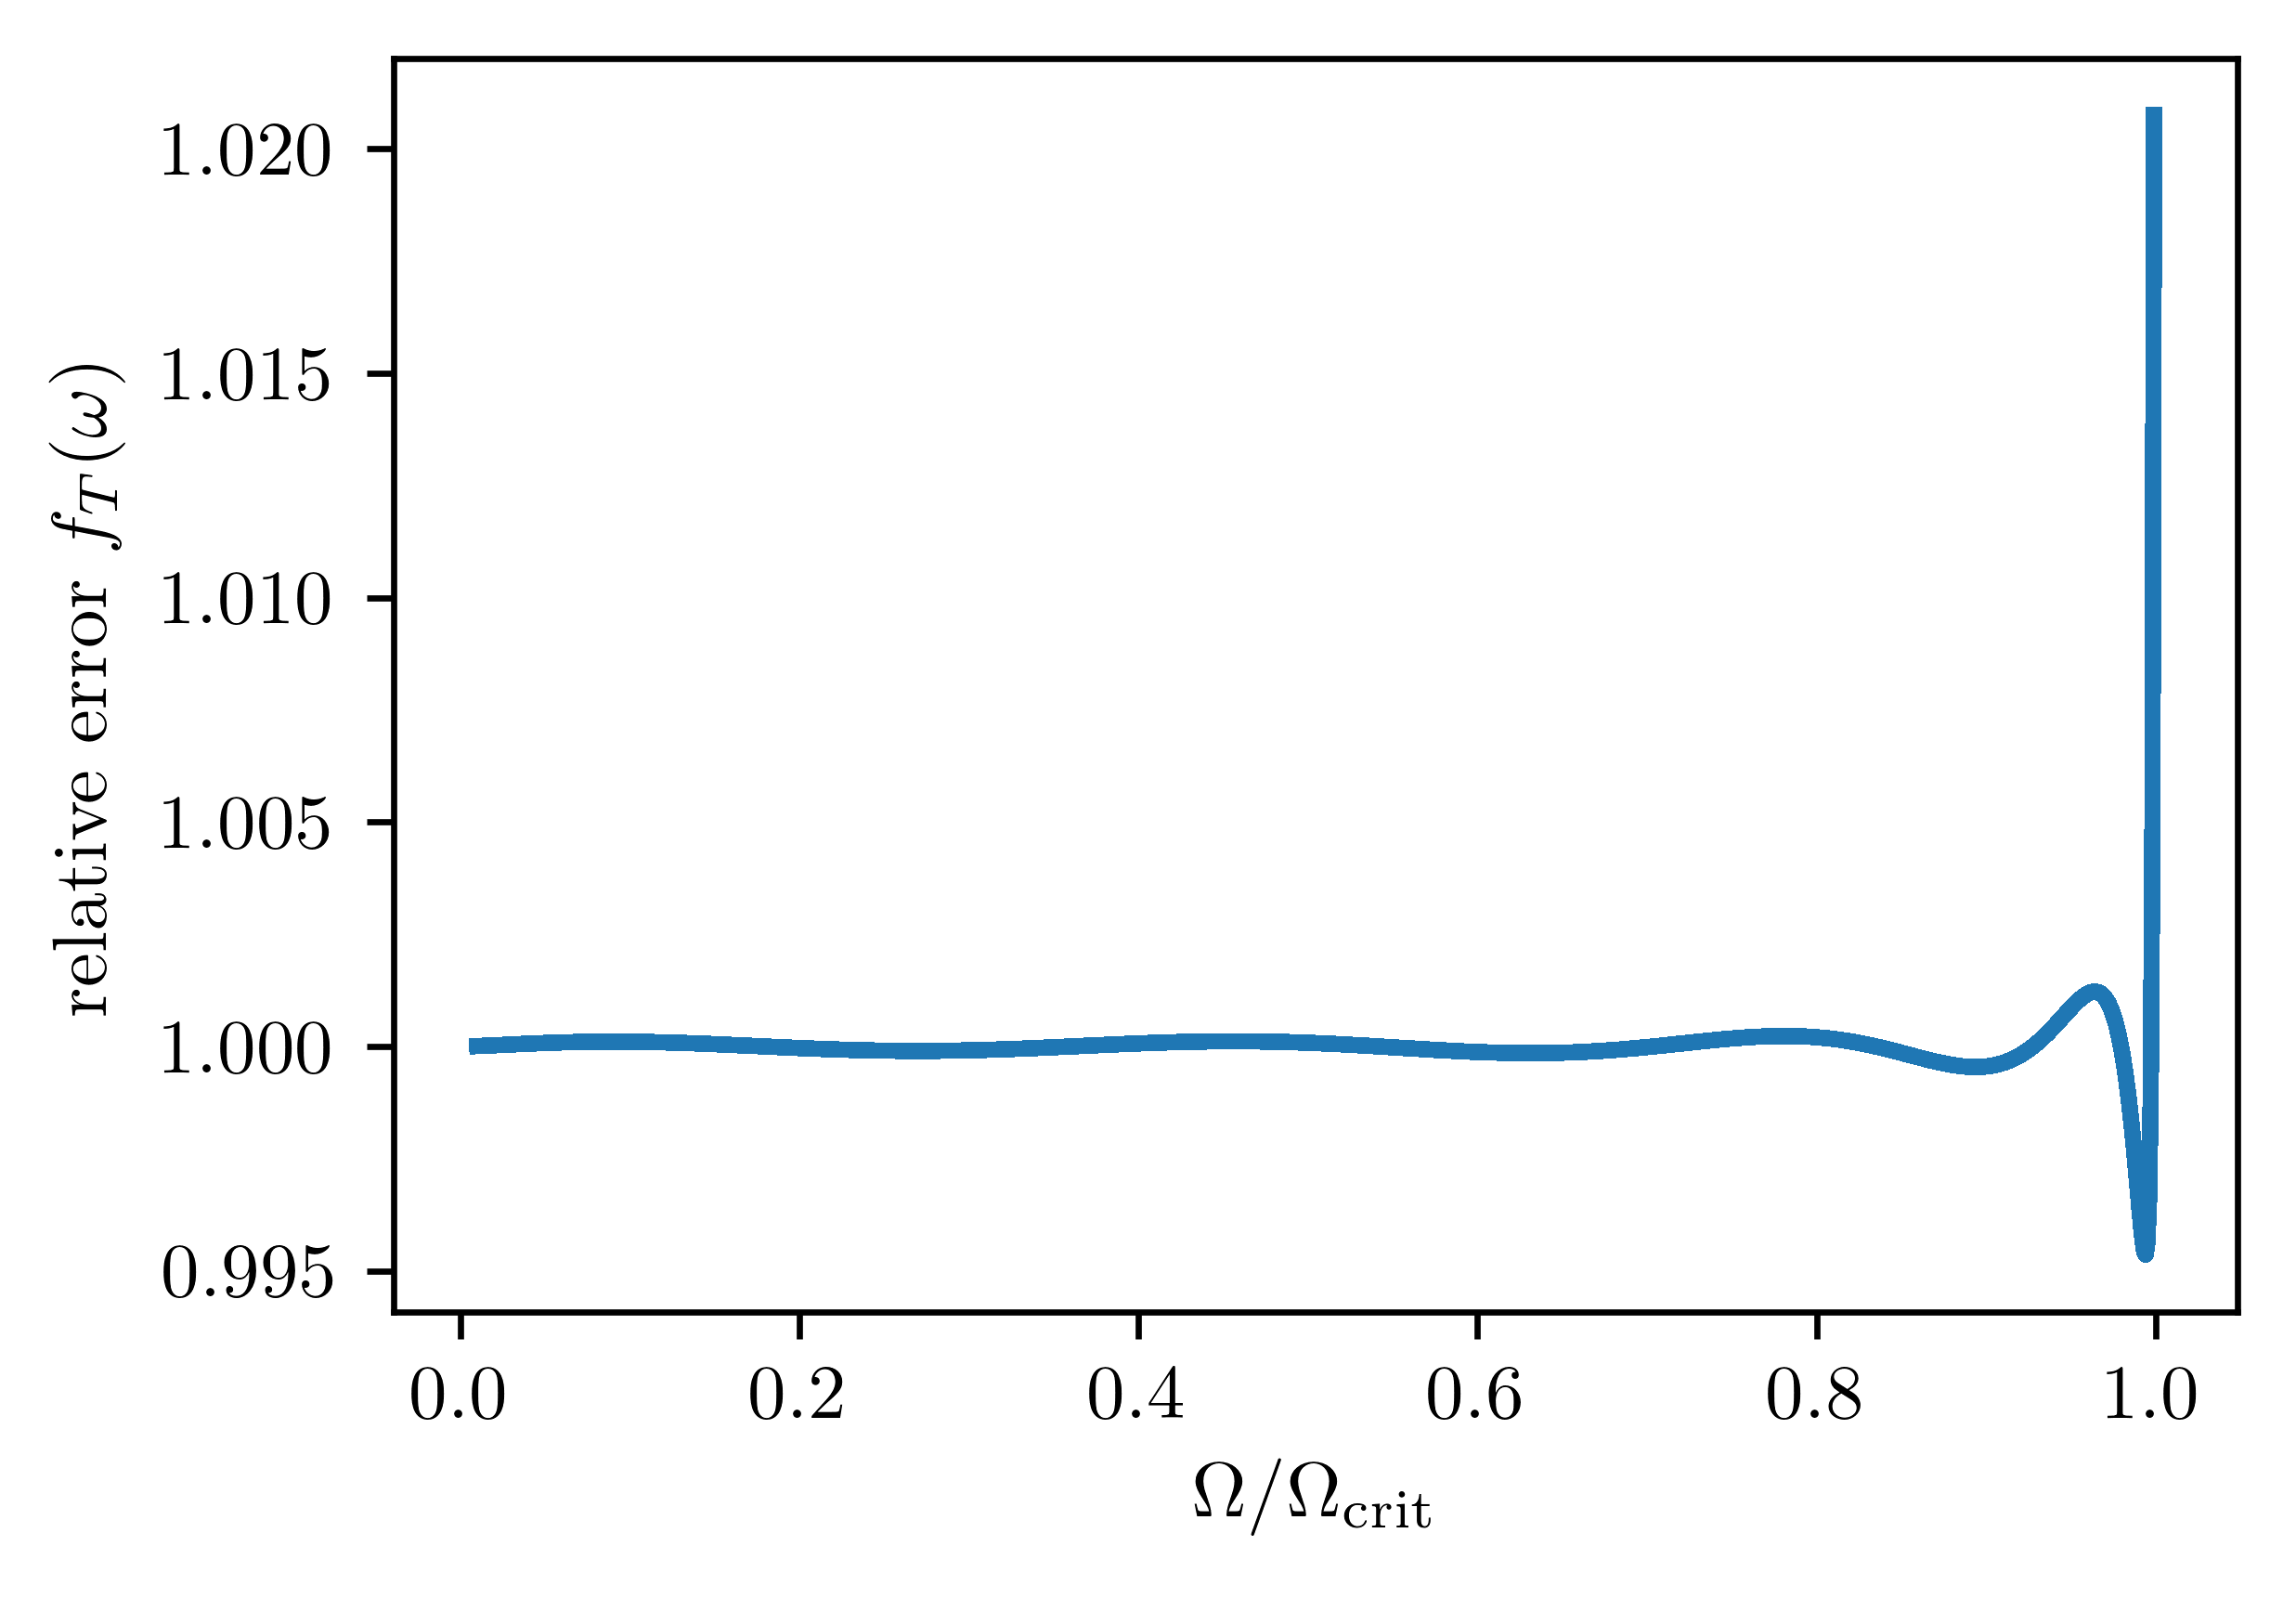

[ 0.94290612  0.17772182  0.27901809 -0.70072156  1.35084099 -3.52325786
  3.66975759 -1.50376848]
0.90487764421


In [227]:
from scipy.optimize import curve_fit
x0 = wcs
y0 = fts

def func(x, a,b,c,d,e,f,g,h):
    return (cos(x**(a)*np.pi/2.))**b*(1+c*x**2+d*x**4+e*x**6+f*x**8+g*x**10+h*x**12)
    #return (1-x**a)**b*(1+c*x**2+d*x**4+e*x**6+f*x**8+g*x**10+h*x**12)
    #return abs(1+c*x**2+d*x**4+e*x**6+f*x**8+g*x**10+h*x**12)
popt, pcov = curve_fit(func, x0, y0)
plt.plot(x0, fts/func(x0, *popt),'-', label='fit')
#plt.plot(x0, np.log10(1-func(x0, *popt)),'-', label='fit')
#plt.plot(x0, np.log10(1-fts), ':', label='numerical integral')
plt.gca().set_ylabel("relative error $f_T(\omega)$")
plt.gca().set_xlabel("$\Omega/\Omega_{\\rm crit}$")
plt.show()
print(popt)
print(func(0.65, *popt))

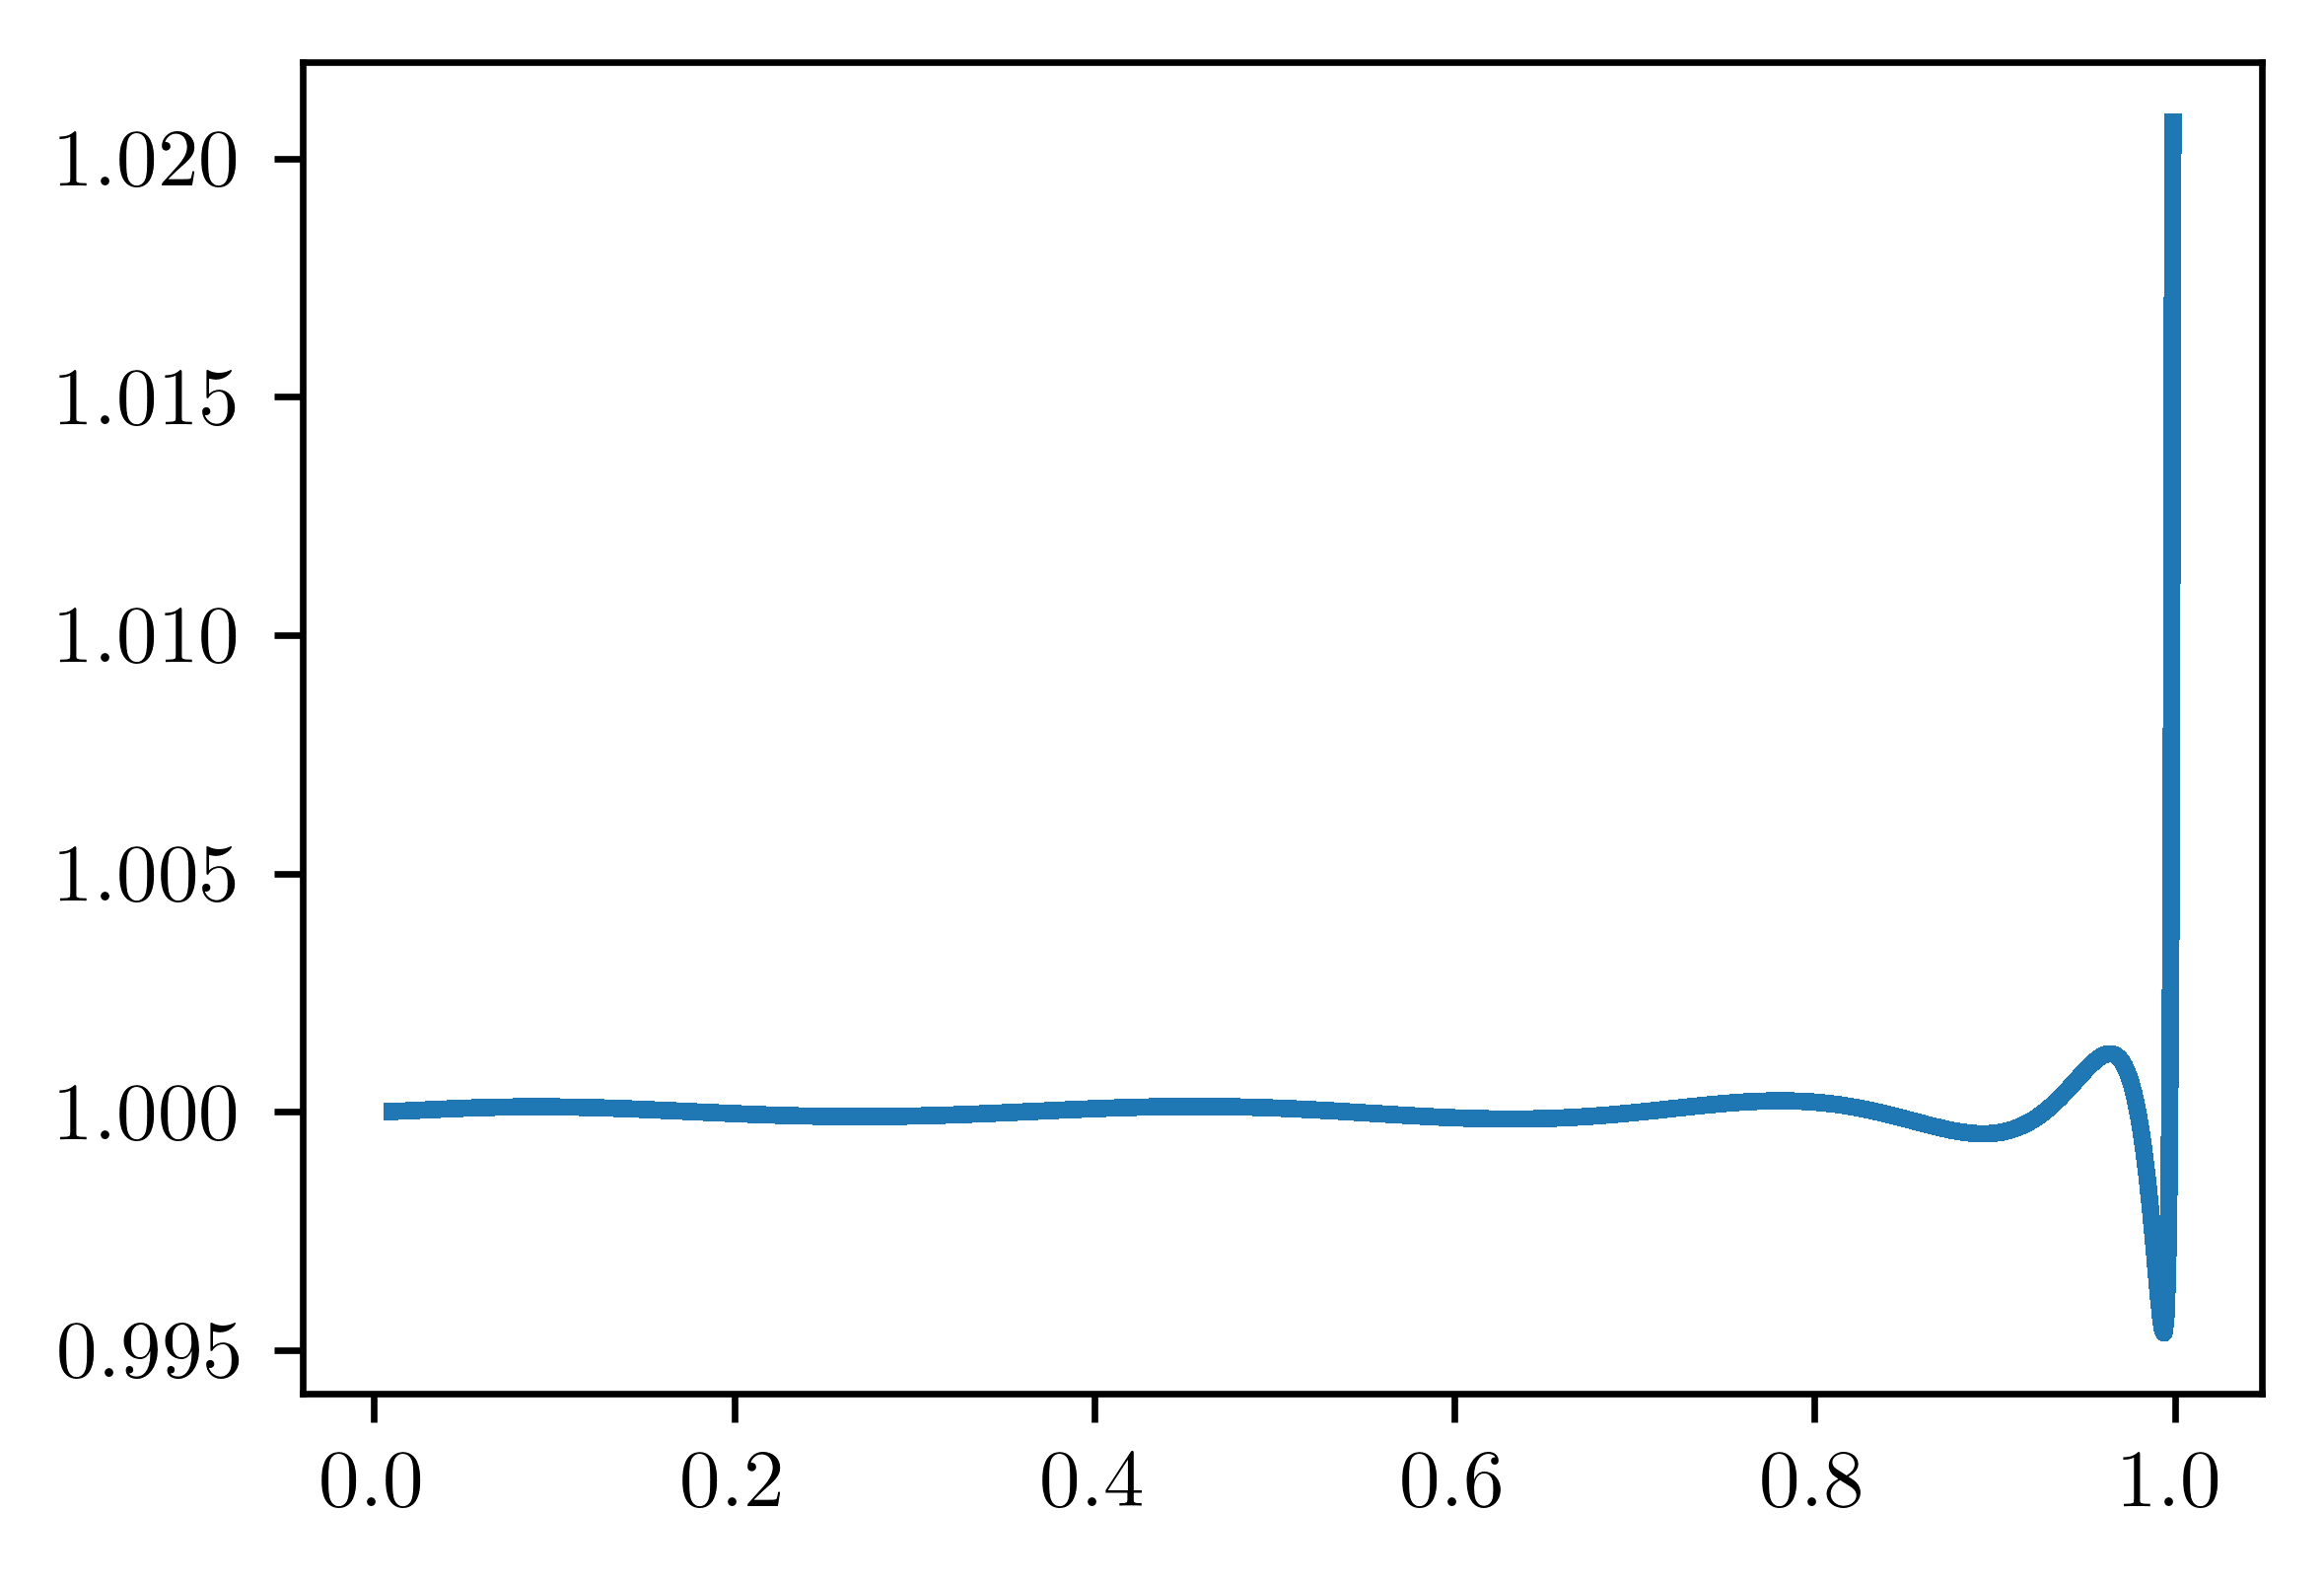

[ 0.94290612  0.17772182  0.27901809 -0.70072156  1.35084099 -3.52325786
  3.66975759 -1.50376848]
0.90487764421


In [200]:
from scipy.optimize import curve_fit
x0 = wcs
y0 = fts

def func(x, a,b,c,d,e,f,g,h):
    return (cos(x**(a)*np.pi/2.))**b*(1+c*x**2+d*x**4+e*x**6+f*x**8+g*x**10+h*x**12)
popt, pcov = curve_fit(func, x0, y0)
plt.plot(x0, fts/func(x0, *popt),'-', label='fit')
#plt.plot(x0, np.log10(1-func(x0, *popt)),'-', label='fit')
#plt.plot(x0, np.log10(1-fts), ':', label='numerical integral')
plt.show()
print(popt)
print(func(0.65, *popt))

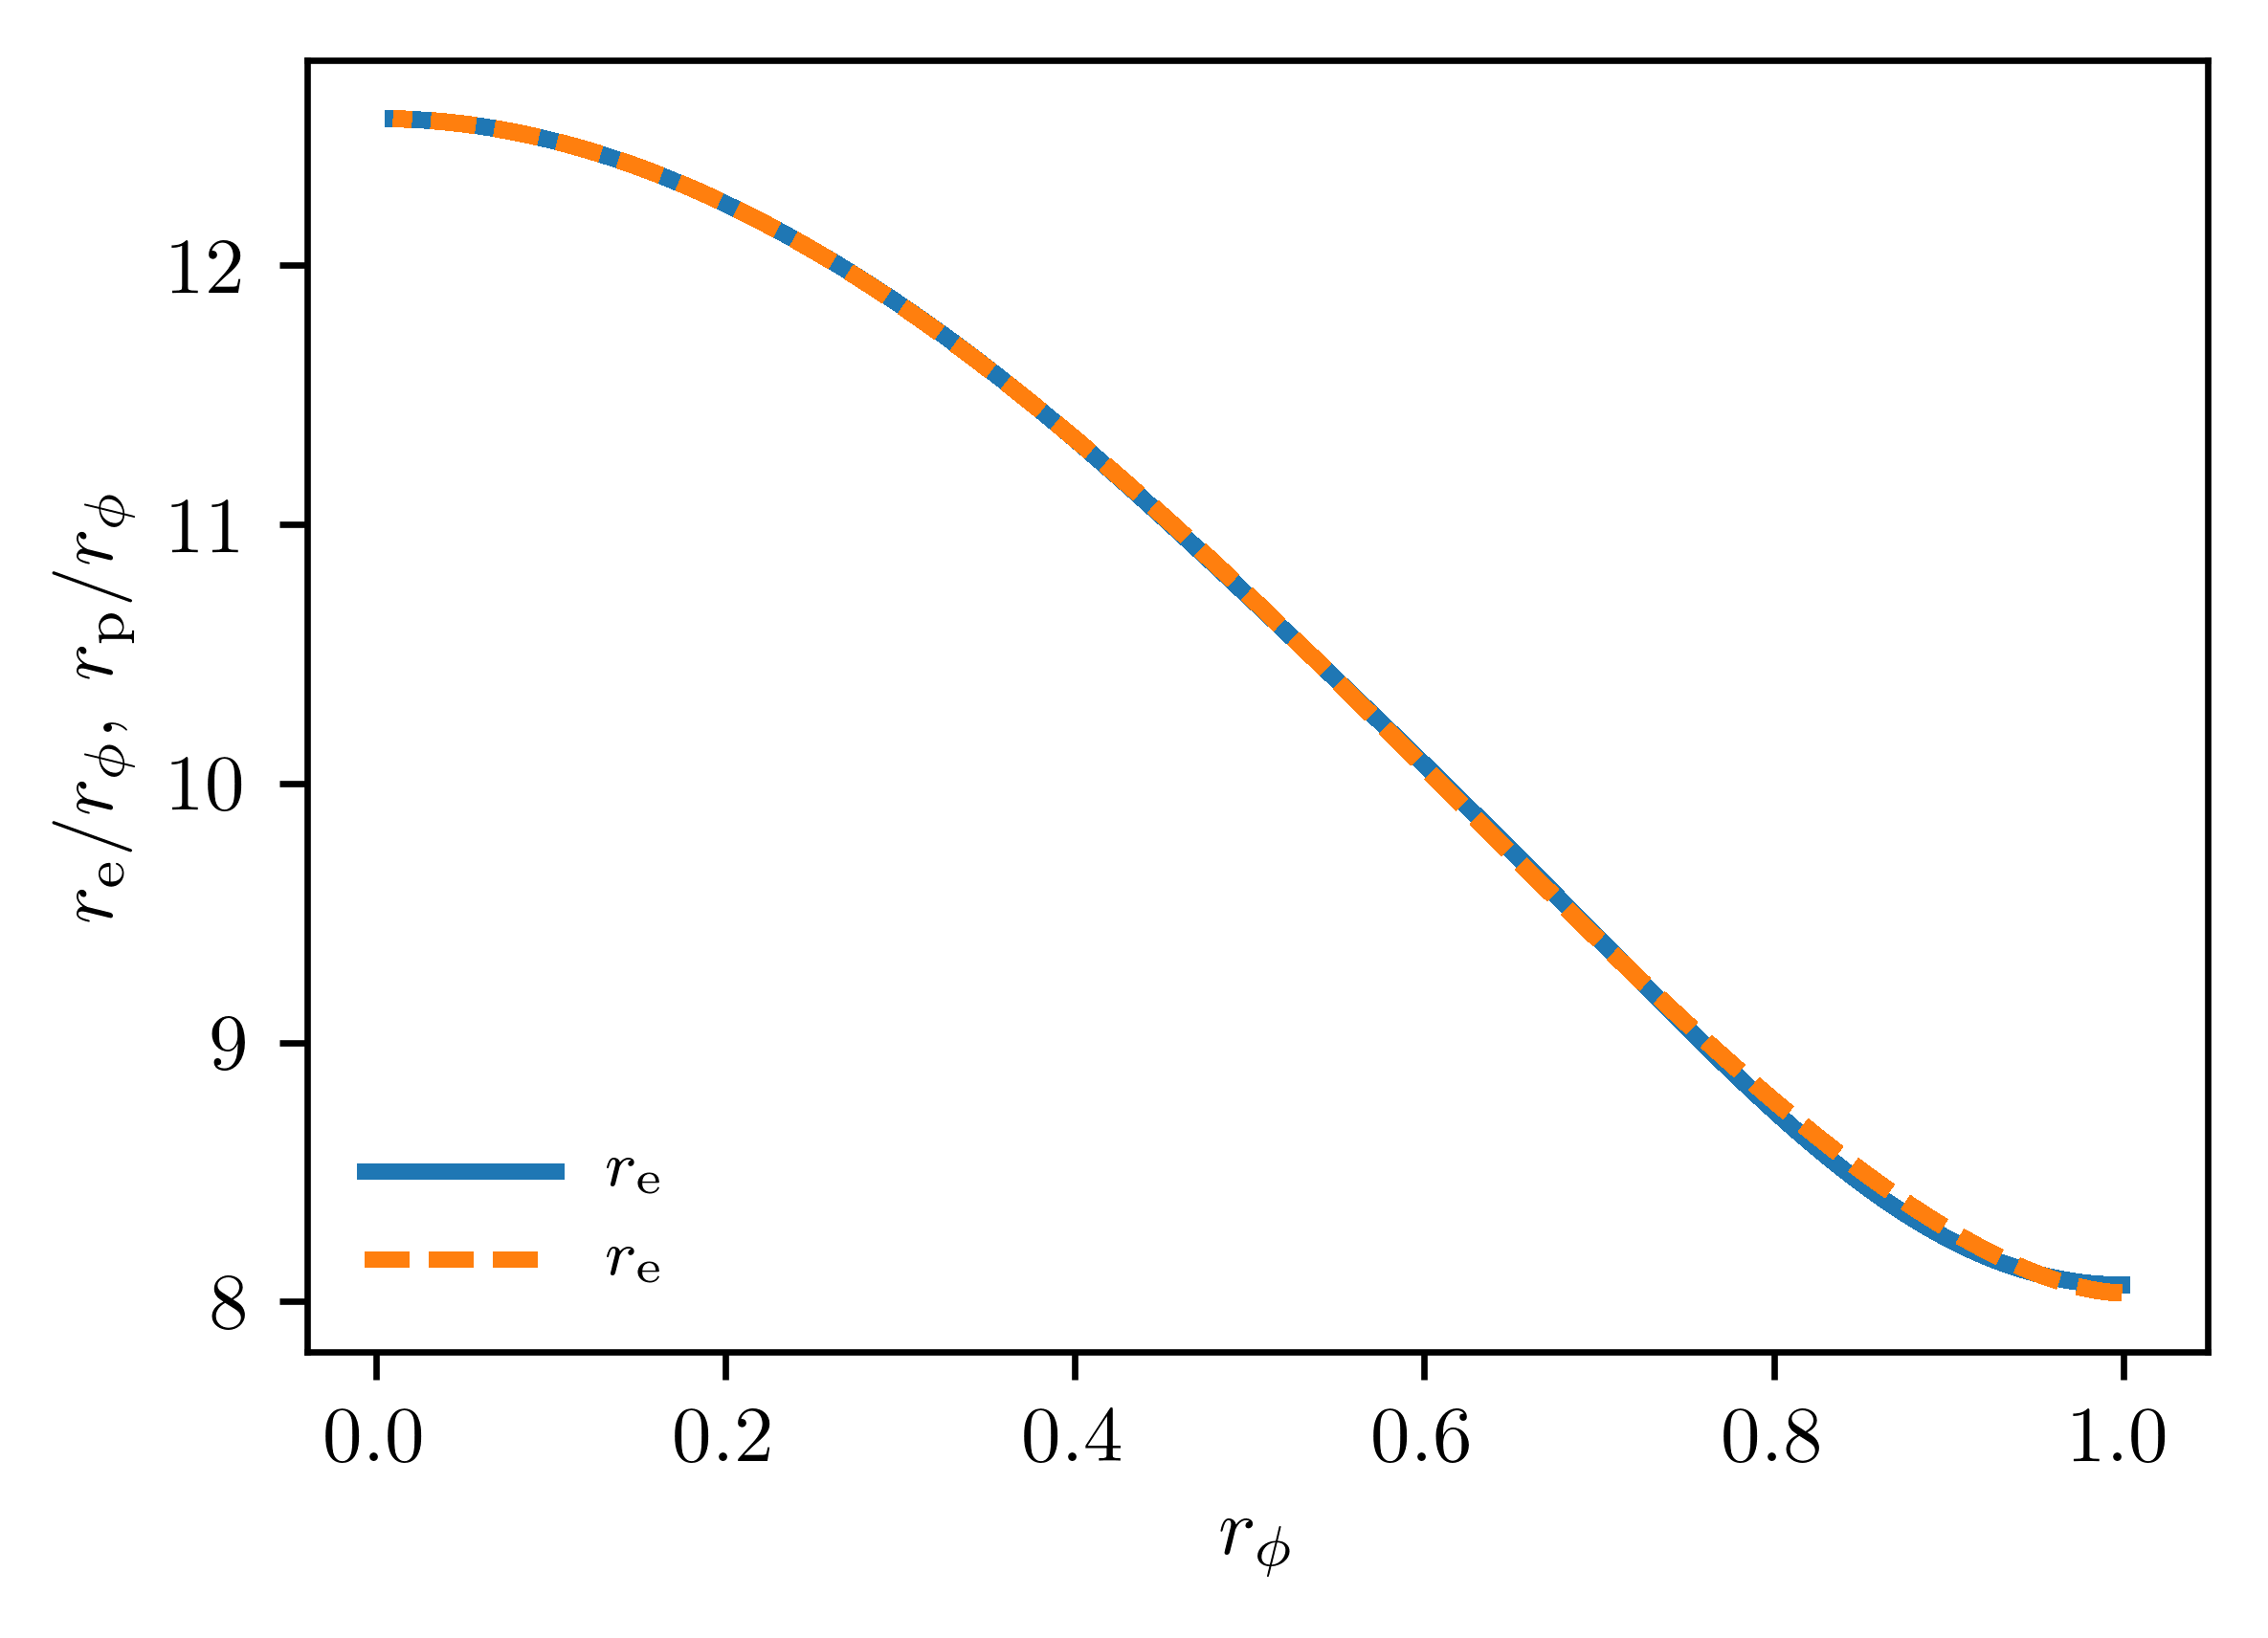

In [217]:
#Check against Steve's results
ww = wcs
ww_steve = np.sqrt(27./8.)*rps**(3./2.)
s1 = 4*np.pi*(1-0.19696*ww_steve**2-0.094292*ww_steve**4+0.33812*ww_steve**6-1.3066*ww_steve**8+1.8286*ww_steve**10-0.92714*ww_steve**12)
s1_mine = g_avg*Sphis
plt.plot(res**(3./2.),s1,"-",label="$r_{\\rm e}$")
plt.plot(res**(3./2.),s1_mine,"--",label="$r_{\\rm e}$")
plt.gca().set_xlabel("$r_{\\phi}$")
plt.gca().set_ylabel("$r_{\\rm e}/r_{\\phi},\;r_{\\rm p}/r_{\\phi}$")
plt.legend(loc=3)
plt.show()

In [209]:
np.arctanh([2,0])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arctanh
  """Entry point for launching an IPython kernel.


array([ nan,   0.])